- Compare Slow Lanczos (PyHessian, Papyan, Demmel) and Fast Lanczos (Papyan, Demmel)
- Reproduce the experiments from Example 7.1 in the book "Applied Numerical Linear Algebra" by J. Demmel. Link: http://www.stat.uchicago.edu/~lekheng/courses/302/demmel/demmch7.pdf

In [47]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import os

if os.getcwd().split("/")[-1] != "lanczos":
    os.chdir("..")
print("CWD:", os.getcwd())

CWD: /home/nadezhda/Desktop/spectral-properties-of-NN/lanczos


In [49]:
import torch
import matplotlib.pyplot as plt
from matrix import *
from utils import *
from plot_utils import plot_spectrum_combined, plot_lanczos_iterations

In [50]:
mtx_size = 100
num_iterations = 20 # number of steps of the Lanczos algorithm to visualize
num_iterations_SLQ = 50 # number of iterations for SLQ
seed = 10 # set seed to have the same starting vector v1 (for the Lanczos algorithm) in all expetiments

#### Generate eigenvalues

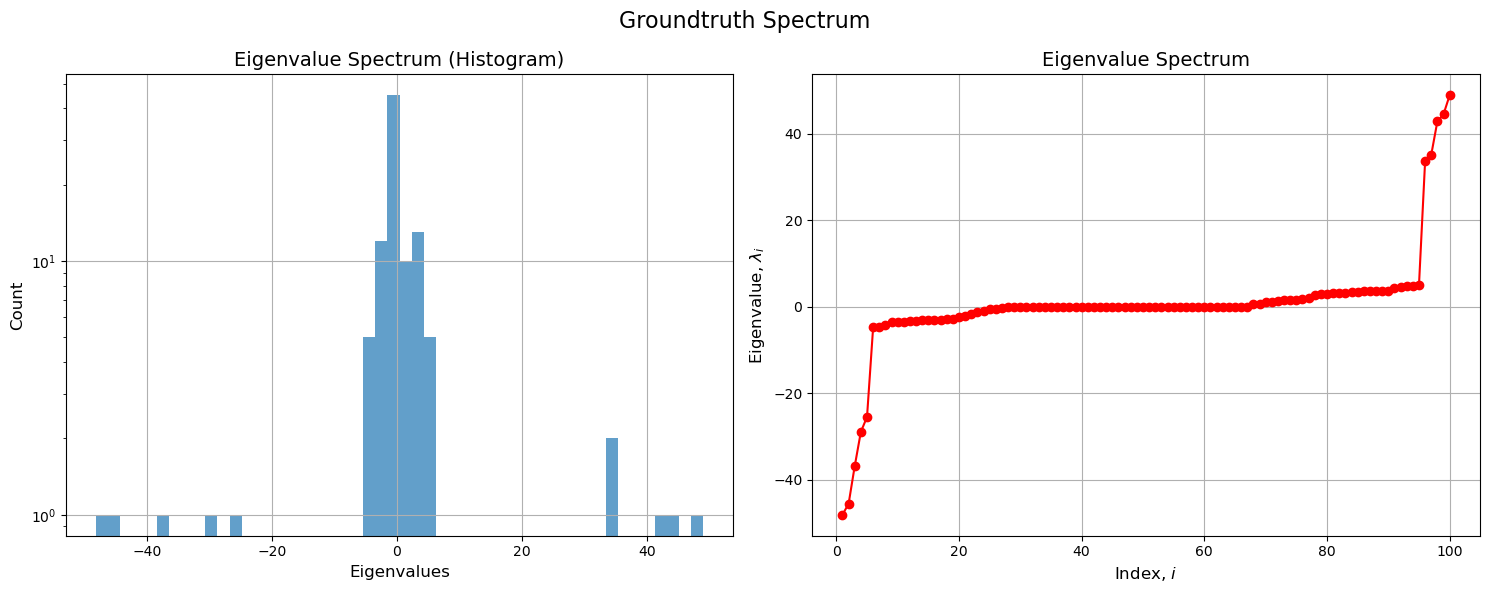

In [51]:
torch.manual_seed(1)
num_bins = 50 # number of bins for the histograms
dict_eigenvalues = {
	'num_around_zero': 50,
	'around_zero_low': -5,
	'around_zero_high': 5,
	'num_pos_extremes': 5,
	'pos_low': 25,
	'pos_high': 50,
	'num_neg_extremes': 5,
	'neg_low': -50,
	'neg_high': -25
}
eigenvalues = generate_eigenvalues(mtx_size, dict_eigenvalues)
plot_spectrum_combined(eigenvalues.numpy(), num_bins=num_bins, title='Groundtruth Spectrum')

#### Matrix computation module

In [52]:
mtx = matrix(eigenvalues)

#### Sanity check

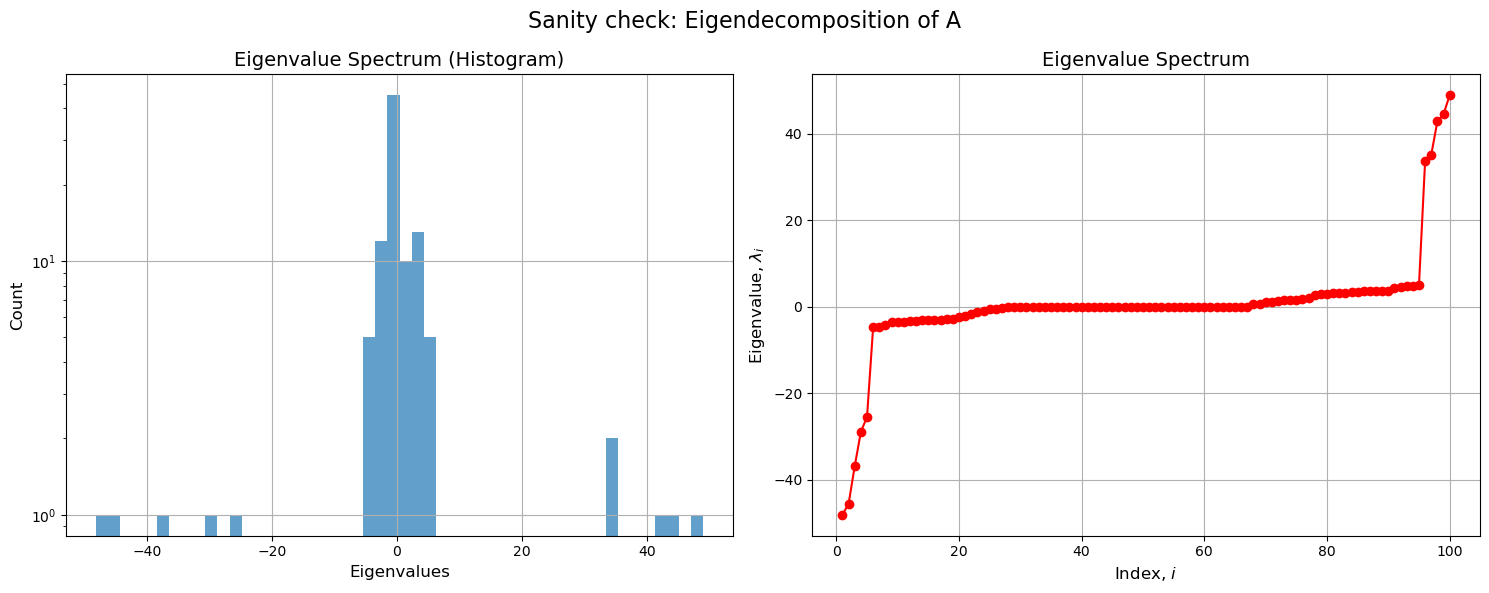

L2 distance: 0.00013413869601208717


In [53]:
A = mtx.get_matrix() # form matrix from eigenvalues and u_vectors
eigenvalues_A, _ = torch.linalg.eig(A)
eigenvalues_A = eigenvalues_A.real  # cast to real numbers
plot_spectrum_combined(eigenvalues_A.numpy(), num_bins=num_bins, title='Sanity check: Eigendecomposition of A') 
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, eigenvalues_A, 2)}")

#### Slow Lanczos algorithm (PyHessian version)

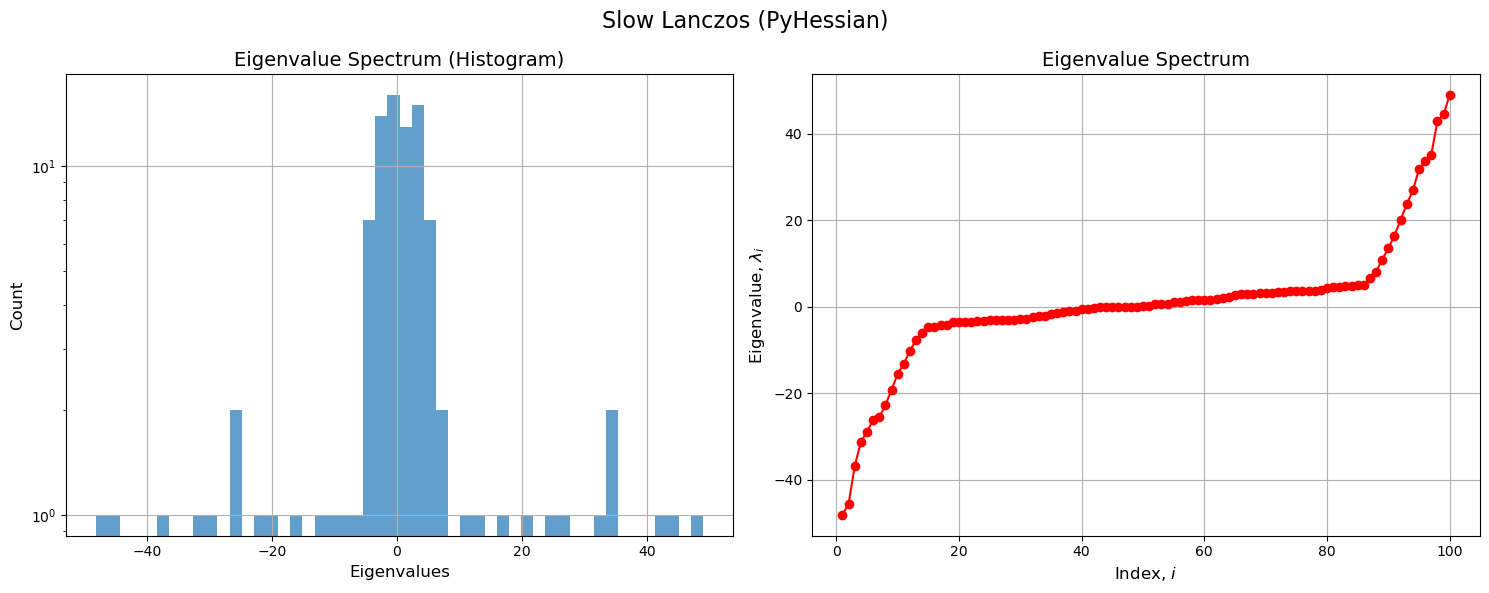

L2 distance: 64.45820617675781


In [54]:
eigenvalues_slow_lanczos_pyhessian, _, alpha_slow_pyhessian, beta_slow_pyhessian = mtx.slow_lanczos_pyhessian(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_pyhessian, num_bins=num_bins, title='Slow Lanczos (PyHessian)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_pyhessian), 2)}")

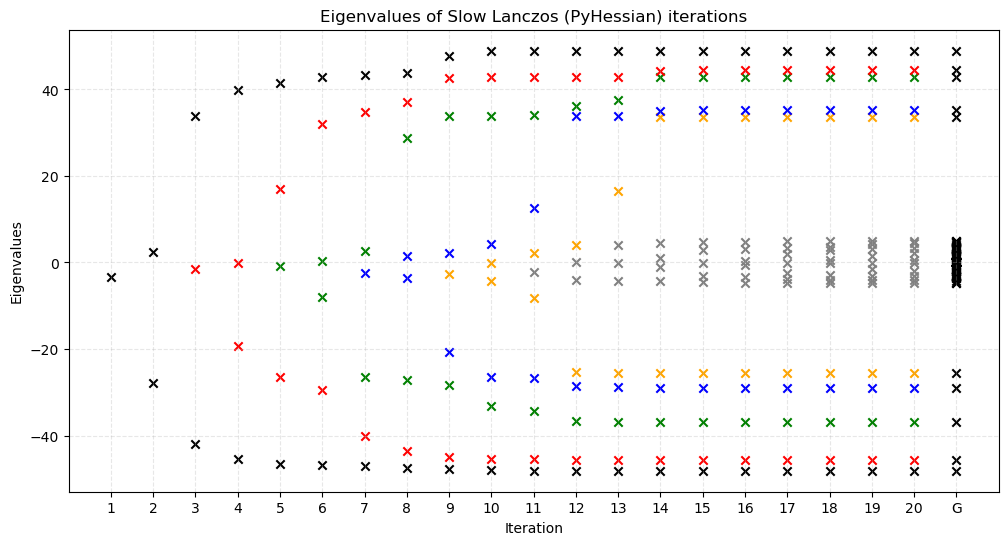

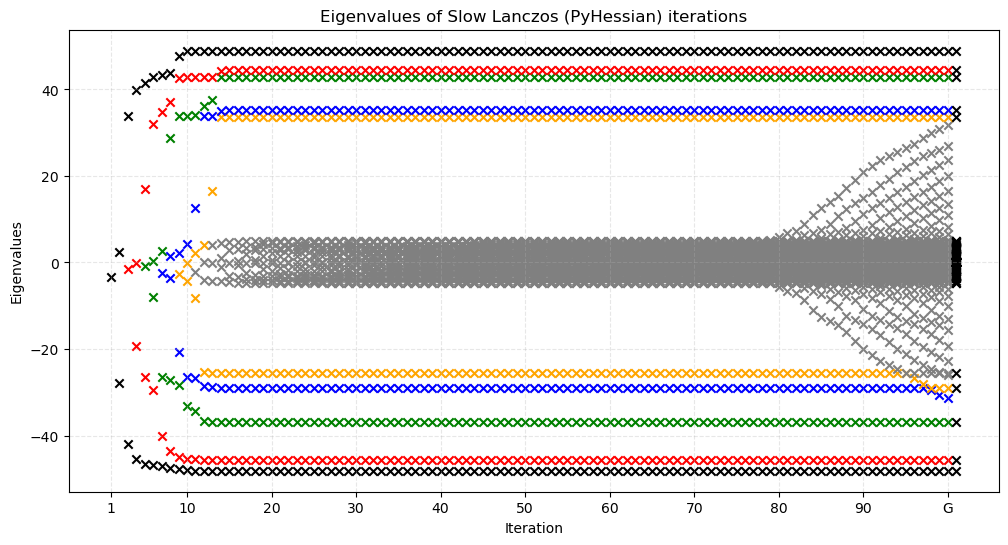

In [55]:
eigenvalues_slow_lanczos_pyhessian_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.slow_lanczos_pyhessian(iter+1, seed=seed)
    eigenvalues_slow_lanczos_pyhessian_list.append(result)
eigenvalues_slow_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_pyhessian_list, "Slow Lanczos (PyHessian)")
eigenvalues_slow_lanczos_pyhessian_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.slow_lanczos_pyhessian(iter+1, seed=seed)
    eigenvalues_slow_lanczos_pyhessian_list.append(result)
eigenvalues_slow_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_pyhessian_list, "Slow Lanczos (PyHessian)")

#### Slow Lanczos algorithm (Papyan's version)

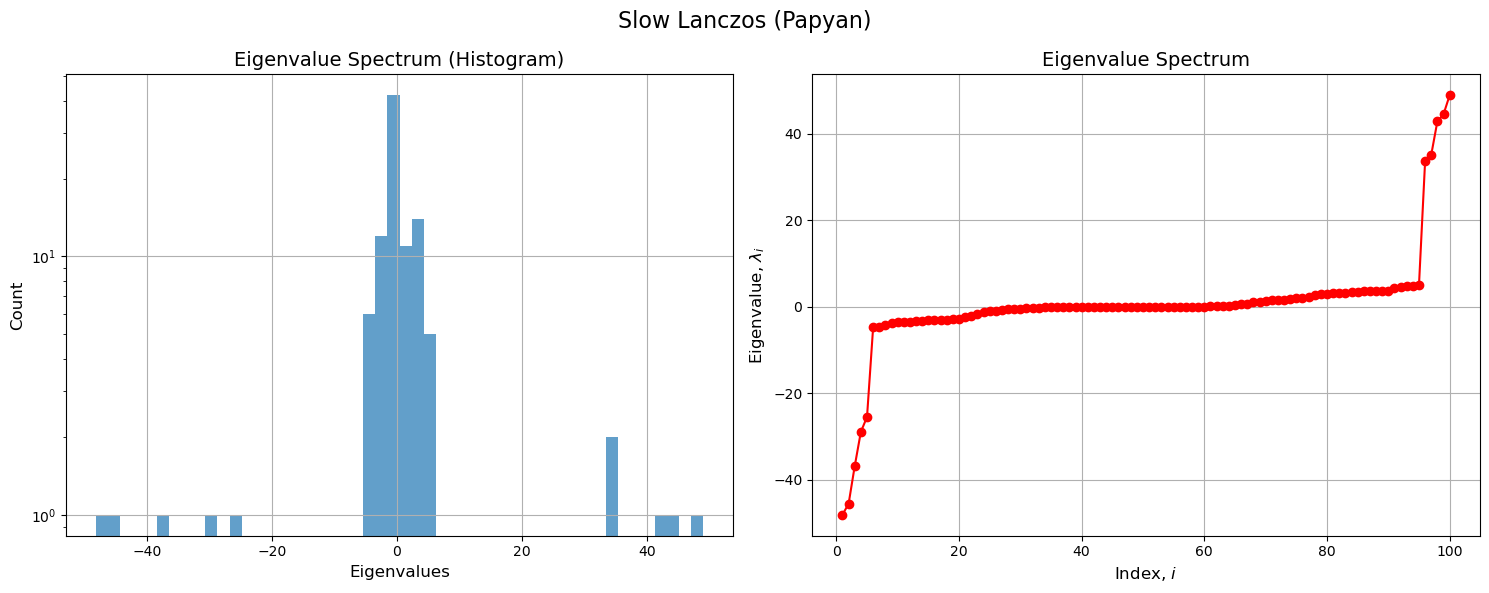

L2 distance: 2.293952703475952


In [56]:
eigenvalues_slow_lanczos_papyan, _, alpha_slow_papyan, beta_slow_papyan = mtx.slow_lanczos_papyan(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_papyan, num_bins=num_bins, title='Slow Lanczos (Papyan)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_papyan), 2)}")

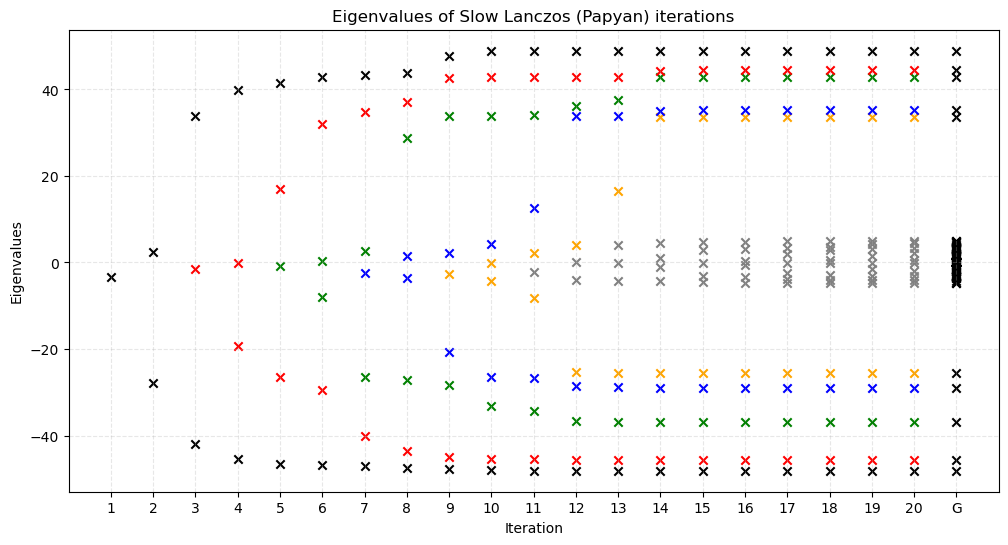

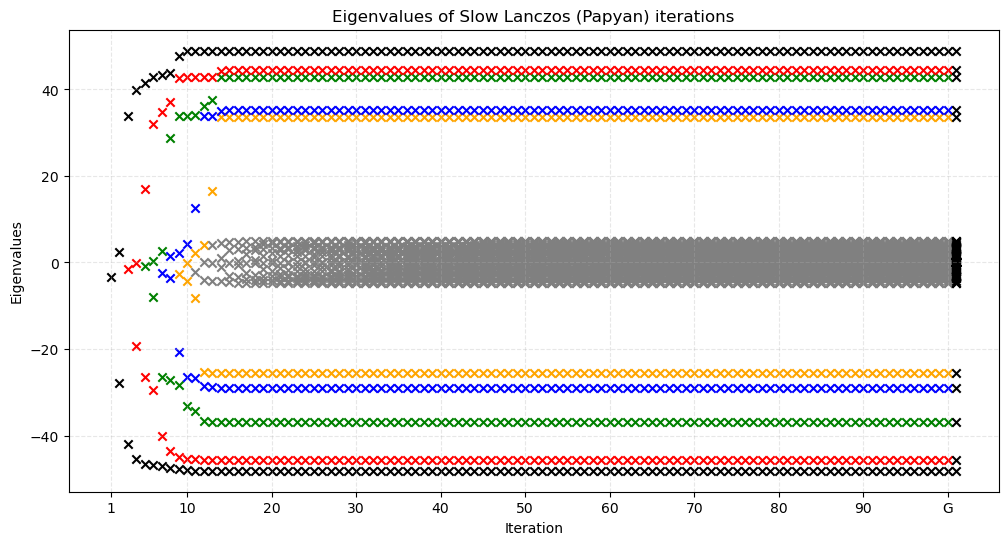

In [57]:
eigenvalues_slow_lanczos_papyan_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.slow_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_slow_lanczos_papyan_list.append(result)
eigenvalues_slow_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_papyan_list, "Slow Lanczos (Papyan)")
eigenvalues_slow_lanczos_papyan_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.slow_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_slow_lanczos_papyan_list.append(result)
eigenvalues_slow_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_papyan_list, "Slow Lanczos (Papyan)")

#### Slow Lanczos algorithm (Demmel's version)

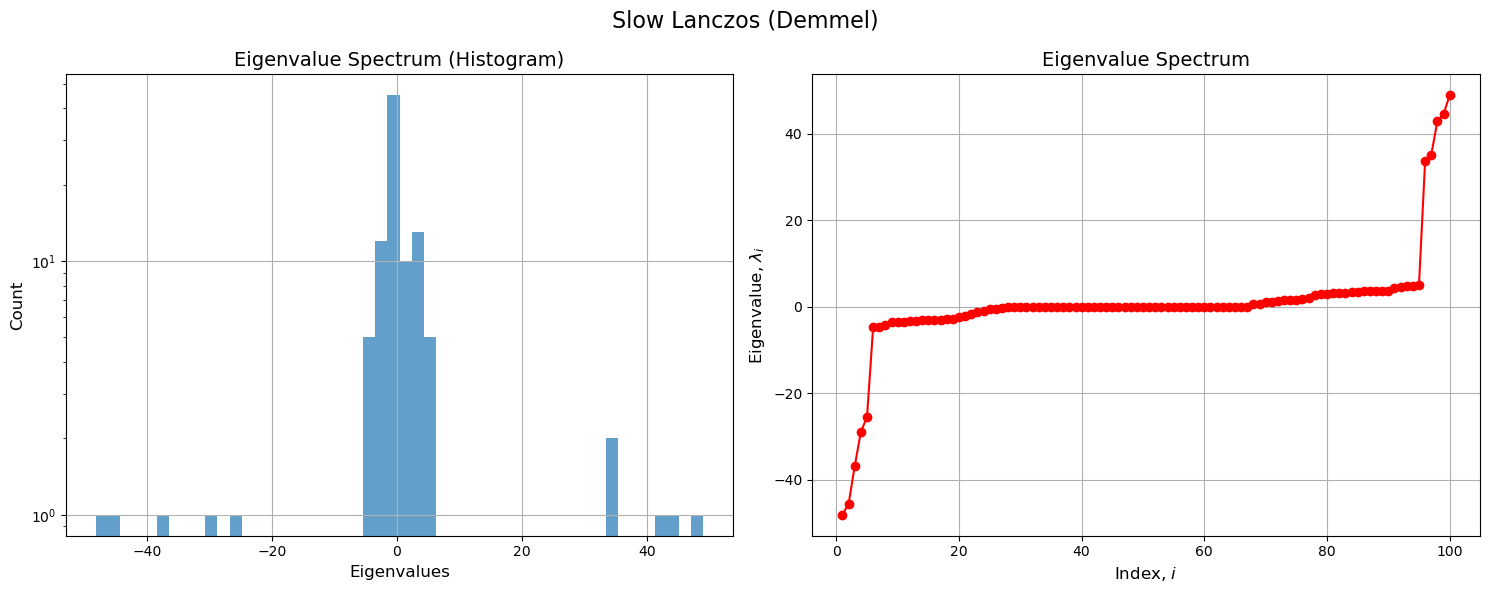

L2 distance: 0.00011720194743247703


In [58]:
eigenvalues_slow_lanczos_demmel, _, alpha_slow_demmel, beta_slow_demmel = mtx.slow_lanczos_demmel(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_demmel, num_bins=num_bins, title='Slow Lanczos (Demmel)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_demmel), 2)}")

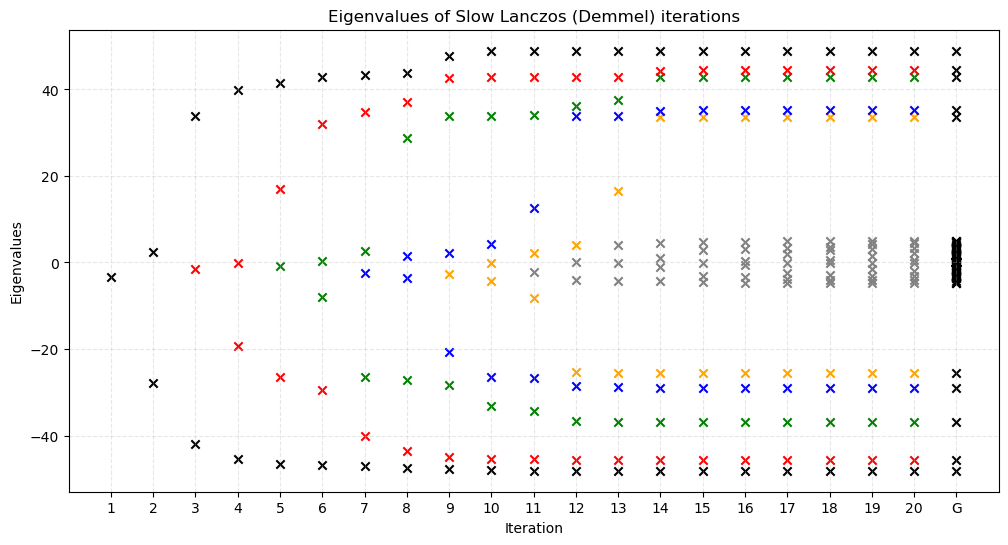

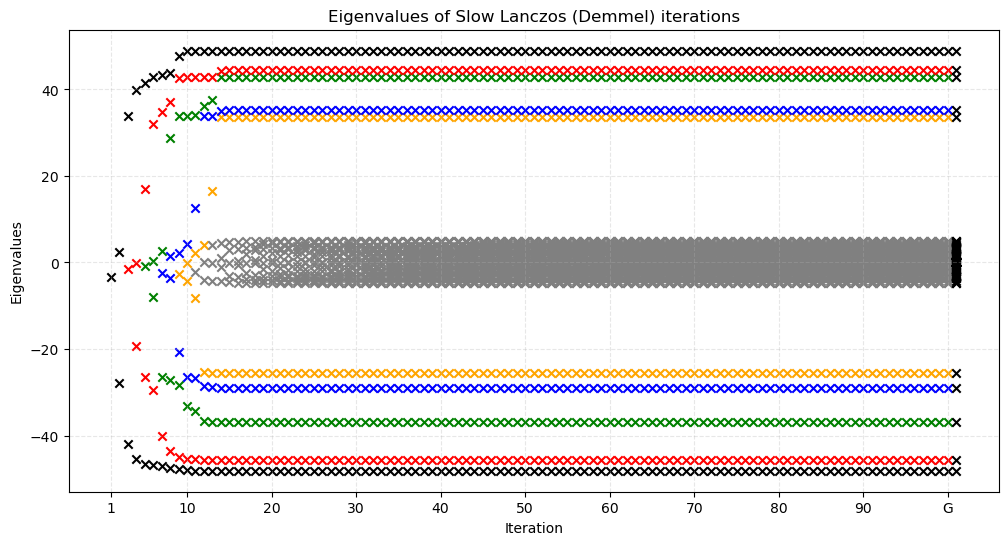

In [59]:
eigenvalues_slow_lanczos_demmel_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.slow_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_slow_lanczos_demmel_list.append(result)
eigenvalues_slow_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_demmel_list, "Slow Lanczos (Demmel)")
eigenvalues_slow_lanczos_demmel_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.slow_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_slow_lanczos_demmel_list.append(result)
eigenvalues_slow_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_demmel_list, "Slow Lanczos (Demmel)")

#### Fast Lanczos algorithm (Papyan's version)

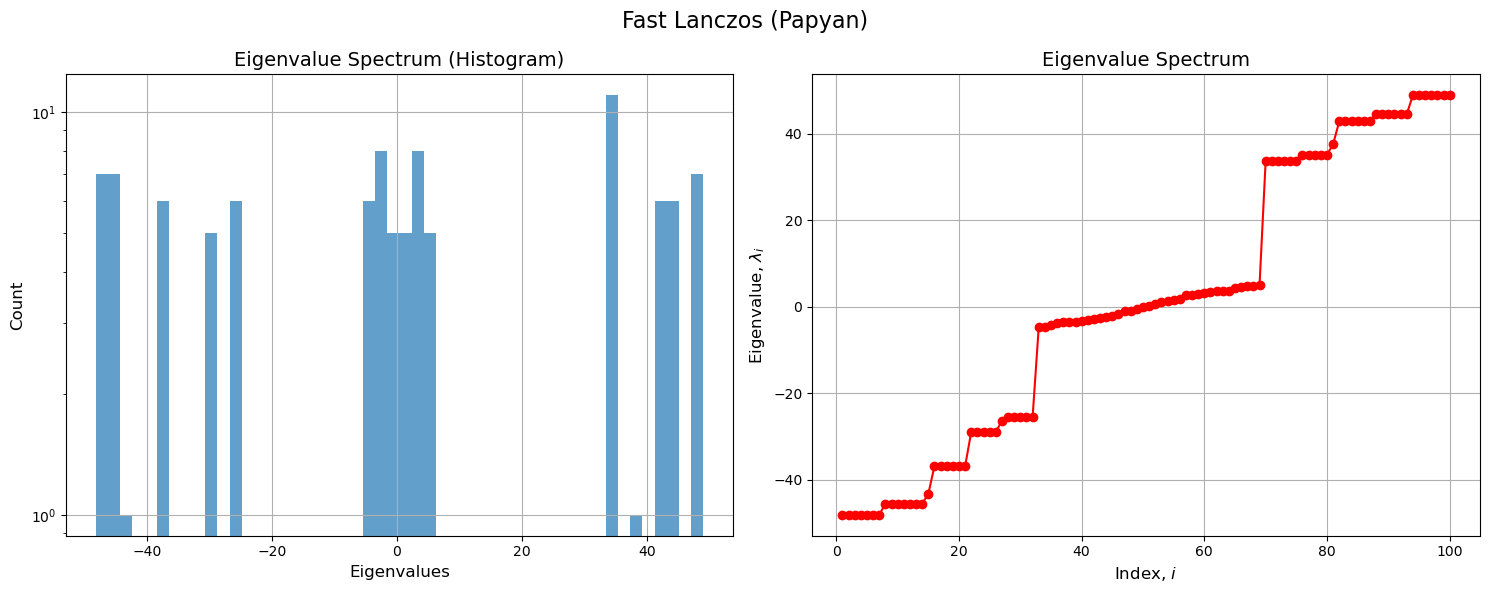

L2 distance: 265.2841796875


In [60]:
eigenvalues_fast_lanczos_papyan, _, alpha_fast_papyan, beta_fast_papyan =  mtx.fast_lanczos_papyan(mtx_size)
plot_spectrum_combined(eigenvalues_fast_lanczos_papyan, num_bins=num_bins, title='Fast Lanczos (Papyan)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_papyan), 2)}")

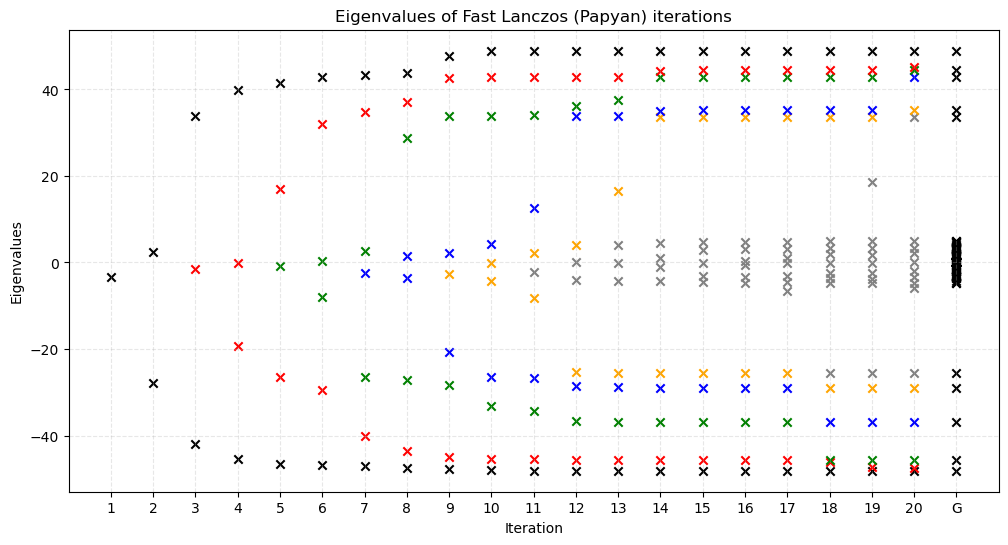

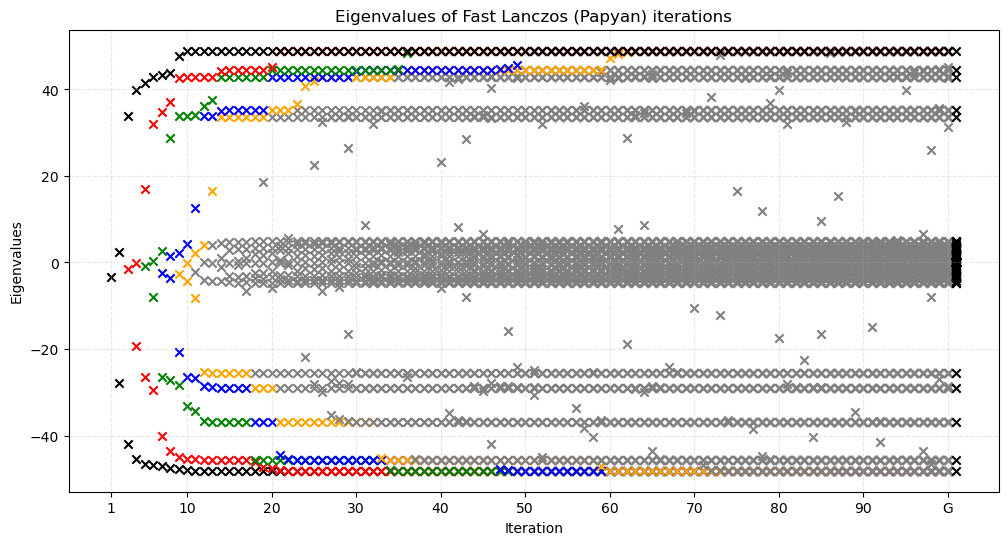

In [61]:
eigenvalues_fast_lanczos_papyan_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.fast_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_fast_lanczos_papyan_list.append(result)
eigenvalues_fast_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_papyan_list, "Fast Lanczos (Papyan)")
eigenvalues_fast_lanczos_papyan_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.fast_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_fast_lanczos_papyan_list.append(result)
eigenvalues_fast_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_papyan_list, "Fast Lanczos (Papyan)")

#### Fast Lanczos algorithm (Demmel's version)

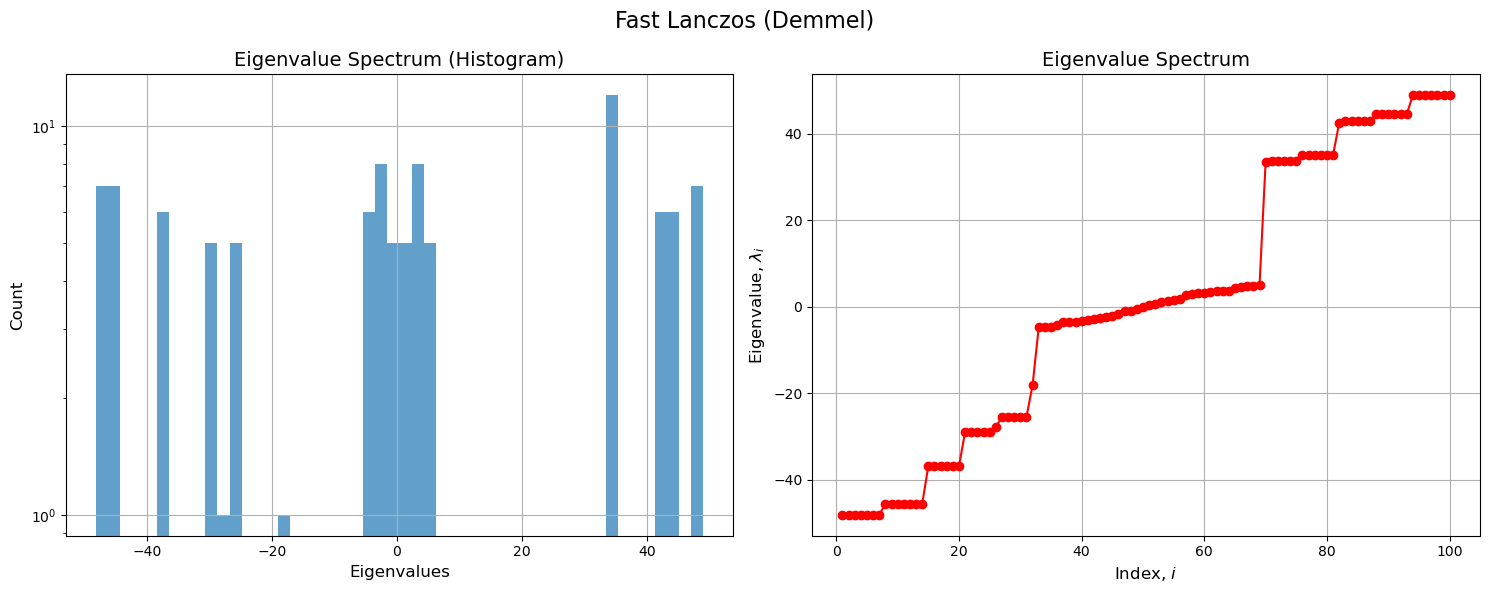

L2 distance: 262.24908447265625


In [62]:
eigenvalues_fast_lanczos_demmel, _, alpha_fast_demmel, beta_fast_demmel =  mtx.fast_lanczos_demmel(mtx_size)
plot_spectrum_combined(eigenvalues_fast_lanczos_demmel, num_bins=num_bins, title='Fast Lanczos (Demmel)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_demmel), 2)}")

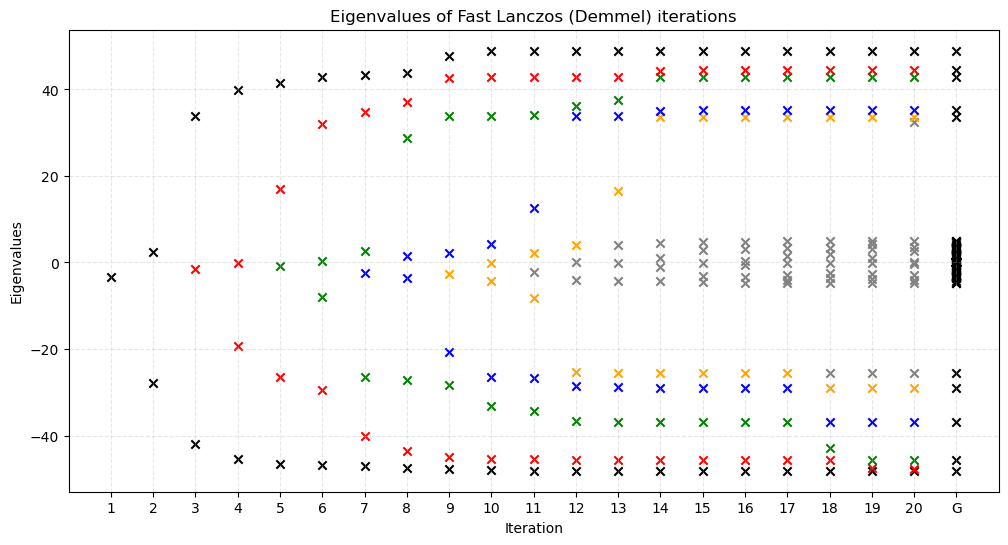

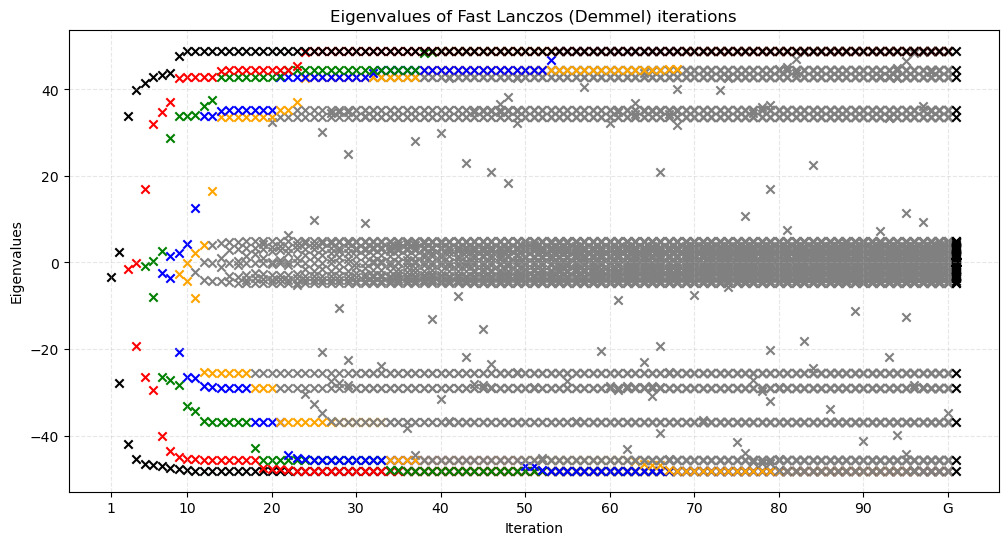

In [63]:
eigenvalues_fast_lanczos_demmel_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.fast_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_fast_lanczos_demmel_list.append(result)
eigenvalues_fast_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_demmel_list, "Fast Lanczos (Demmel)")
eigenvalues_fast_lanczos_demmel_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.fast_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_fast_lanczos_demmel_list.append(result)
eigenvalues_fast_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_demmel_list, "Fast Lanczos (Demmel)")

#### $d$-Lanczos (PyHessian's version)

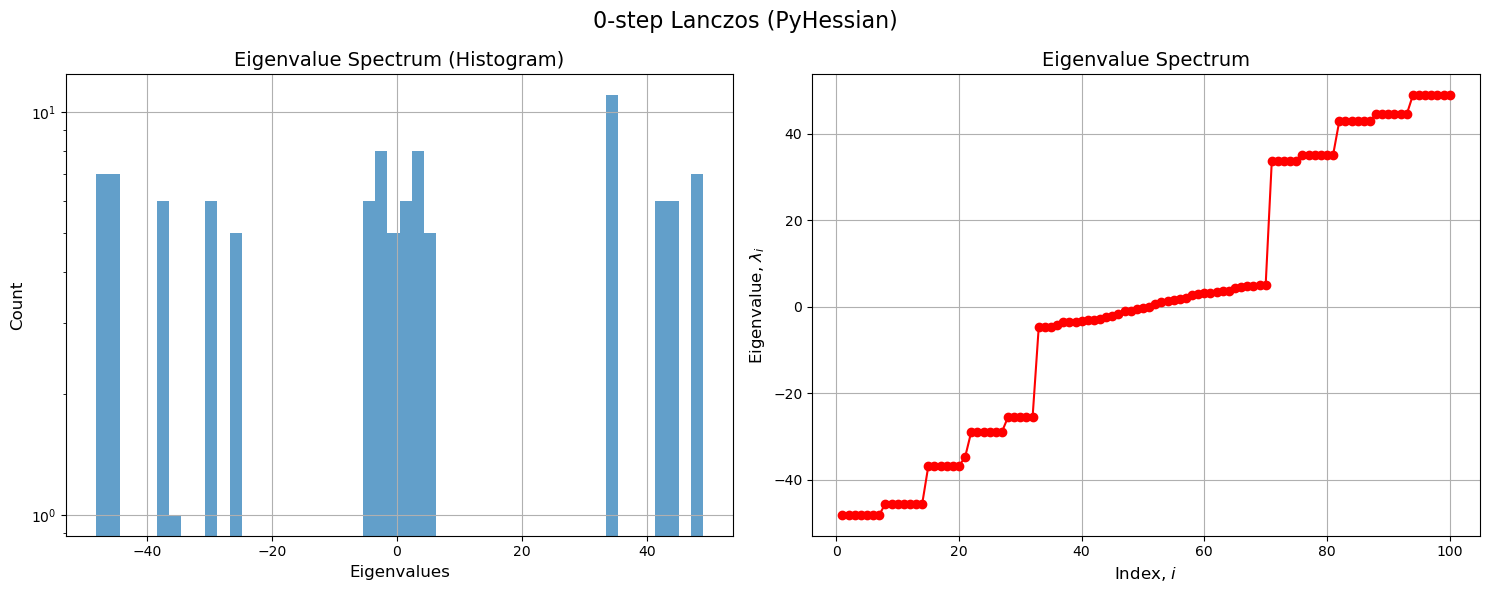

L2 distance: 262.05291748046875


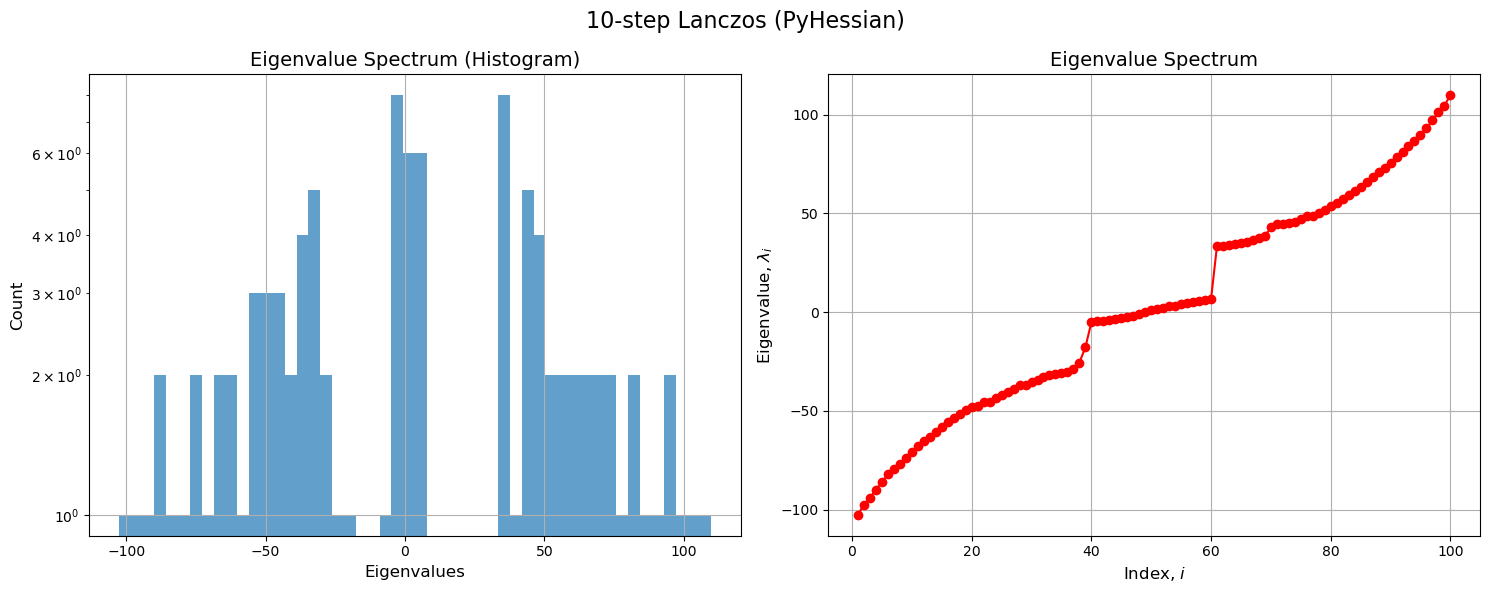

L2 distance: 468.76165771484375


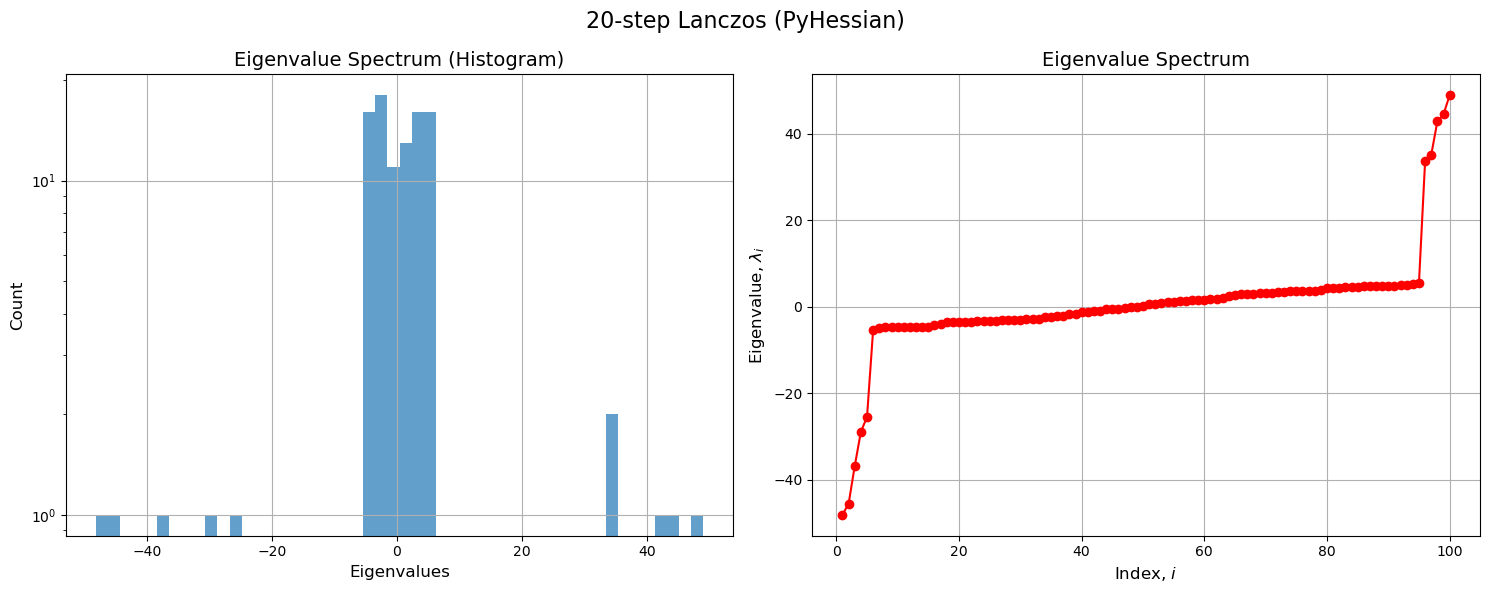

L2 distance: 16.119585037231445


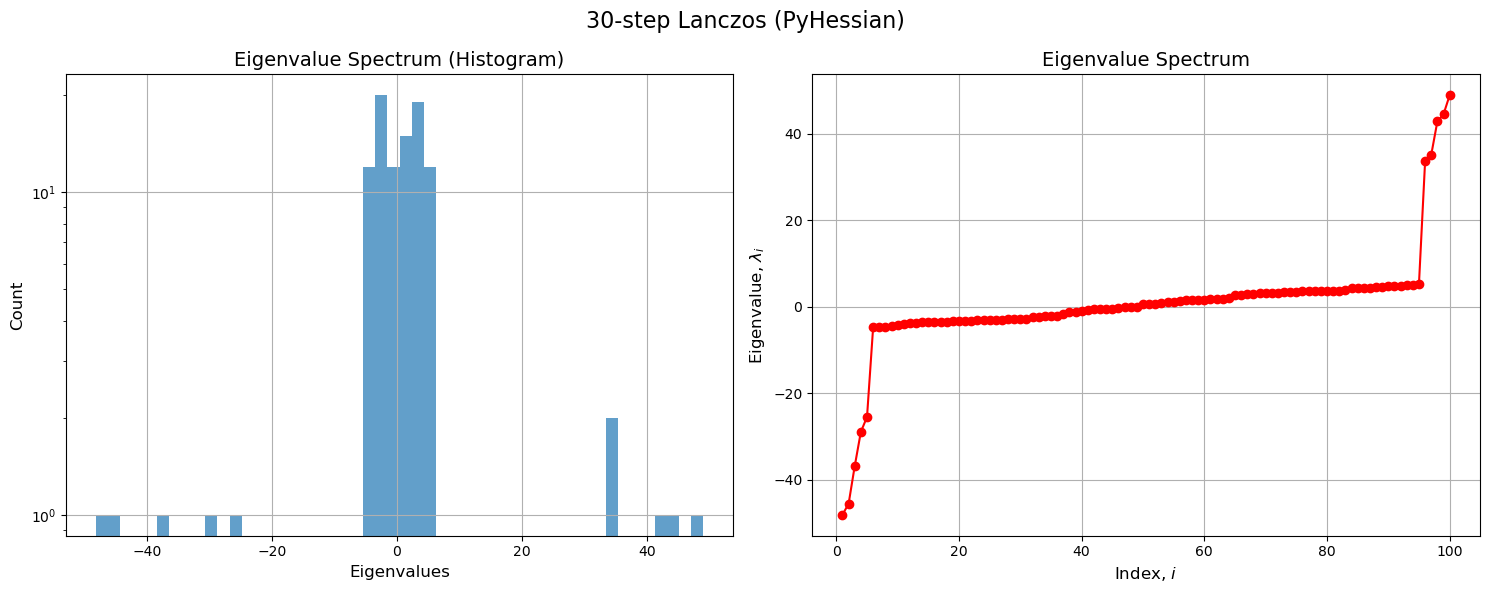

L2 distance: 14.286169052124023


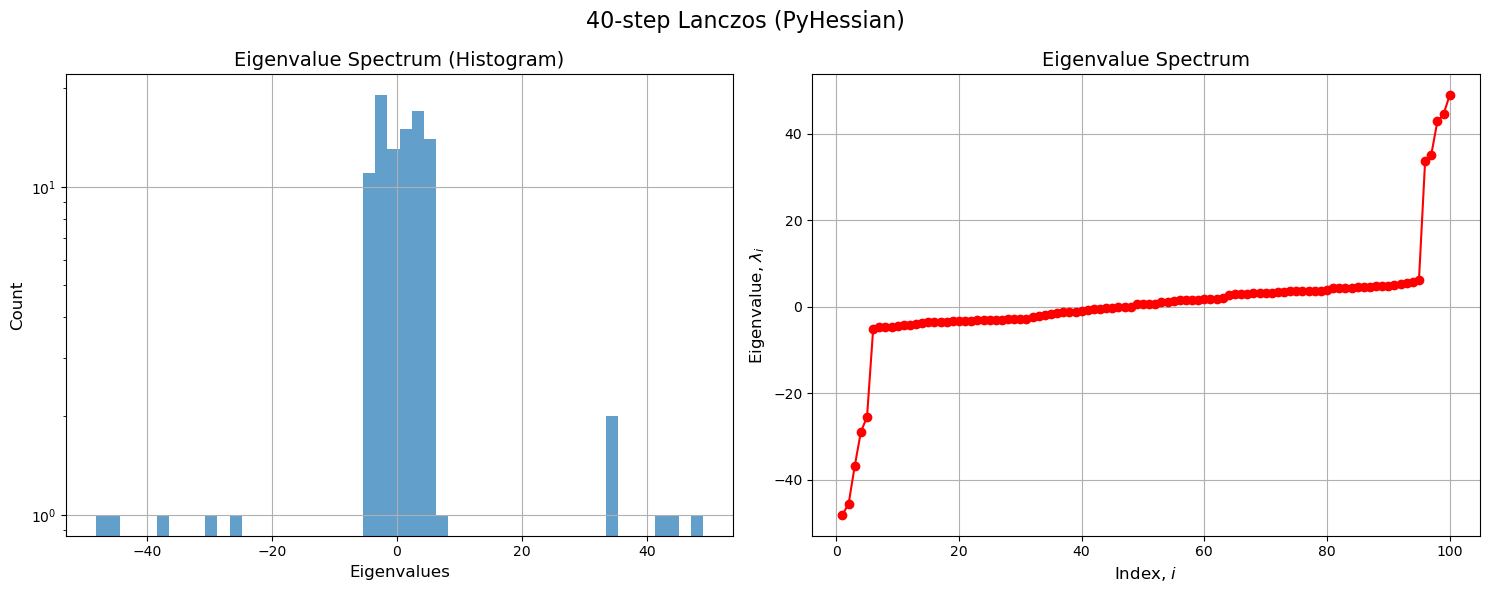

L2 distance: 14.931439399719238


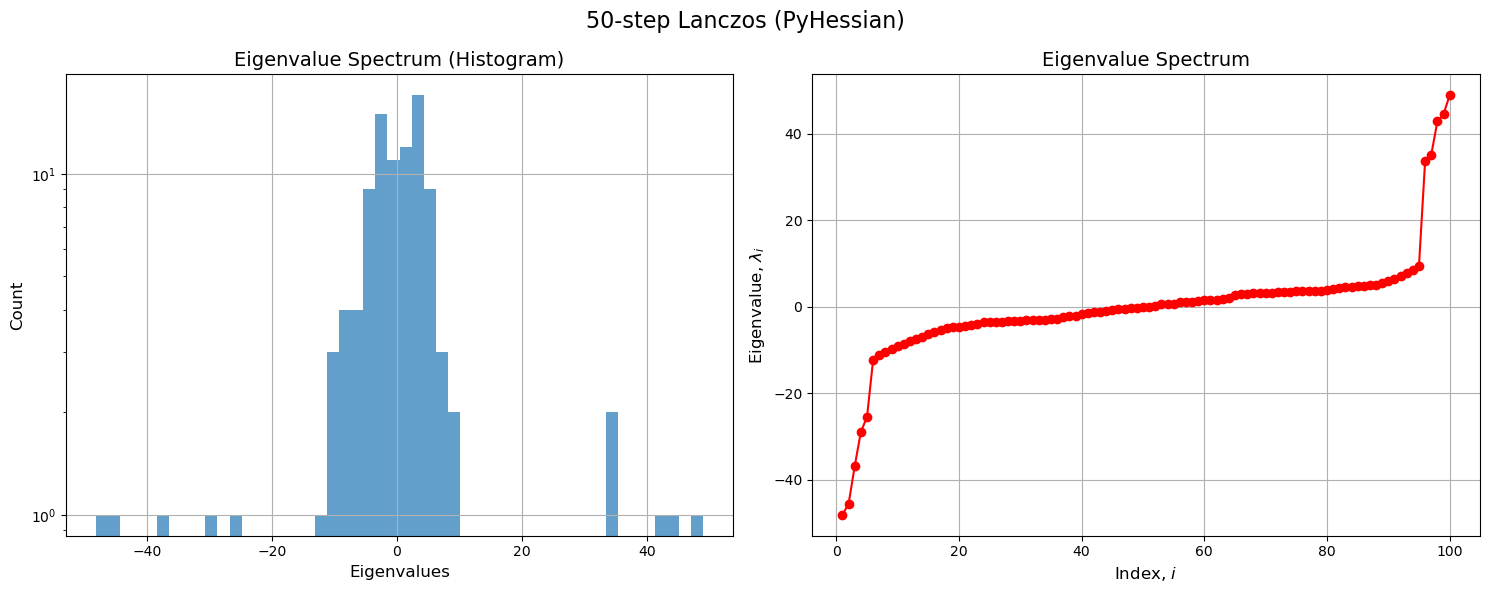

L2 distance: 25.603565216064453


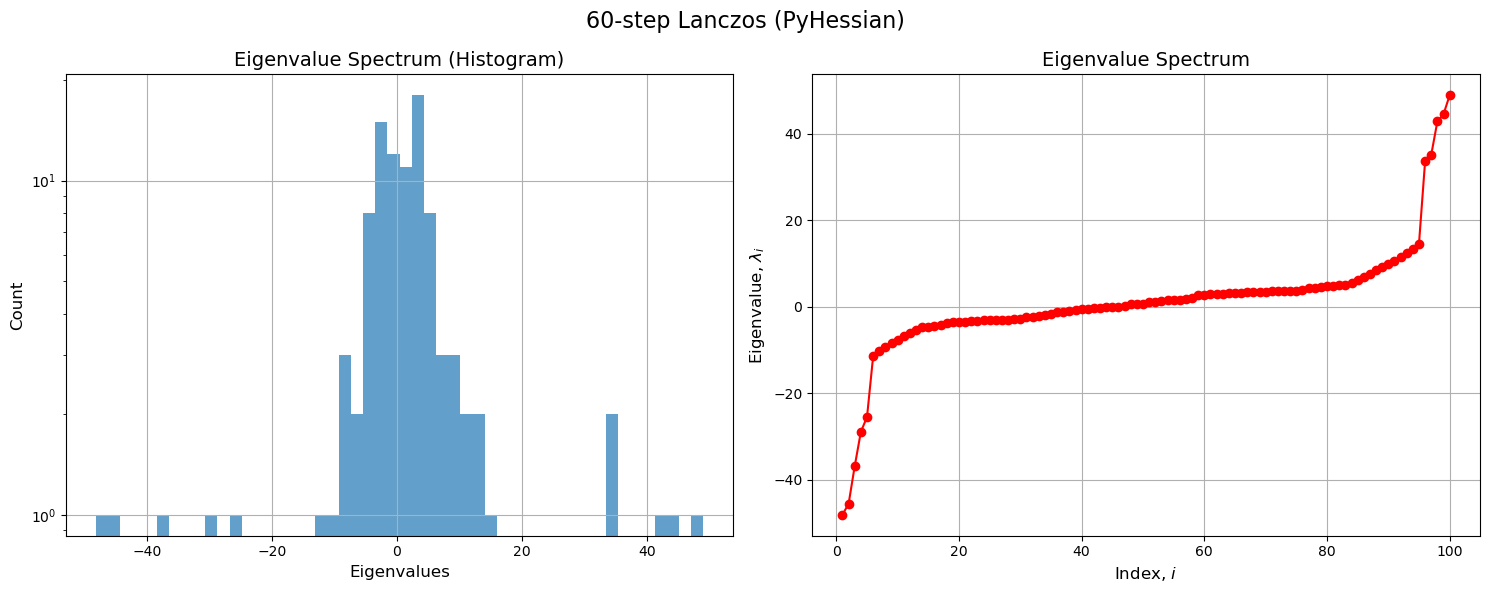

L2 distance: 29.70029640197754


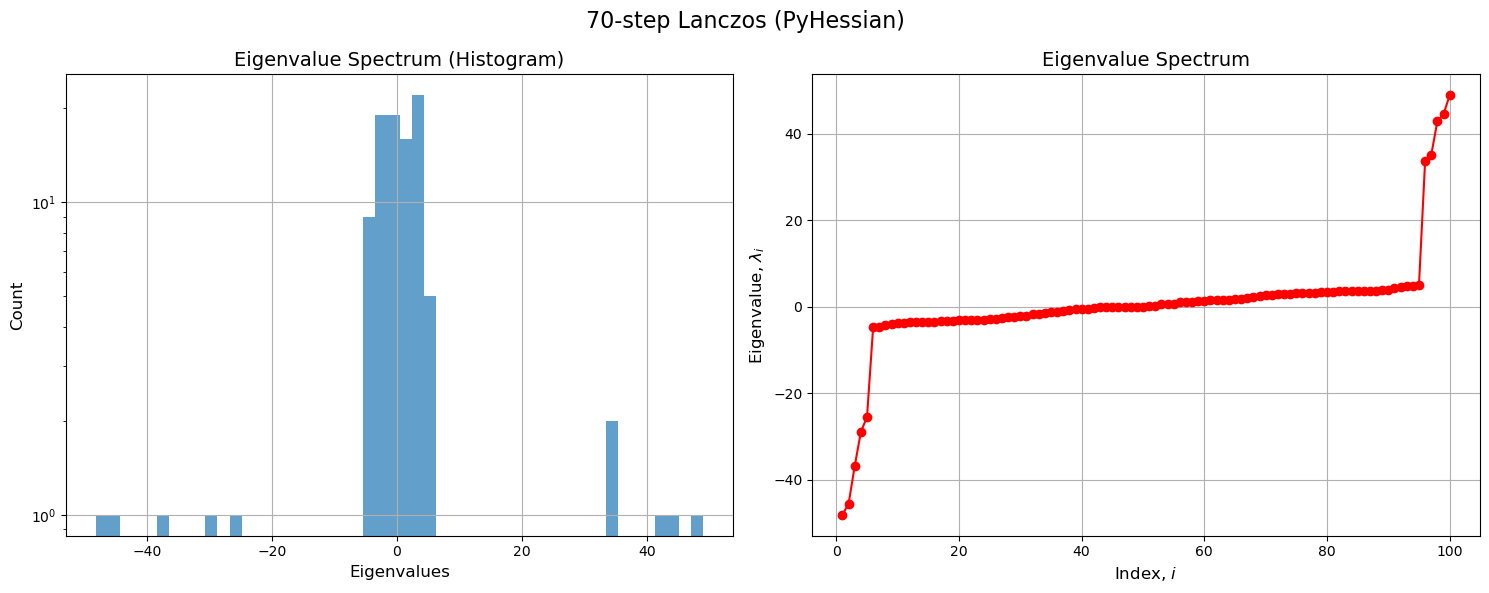

L2 distance: 10.772320747375488


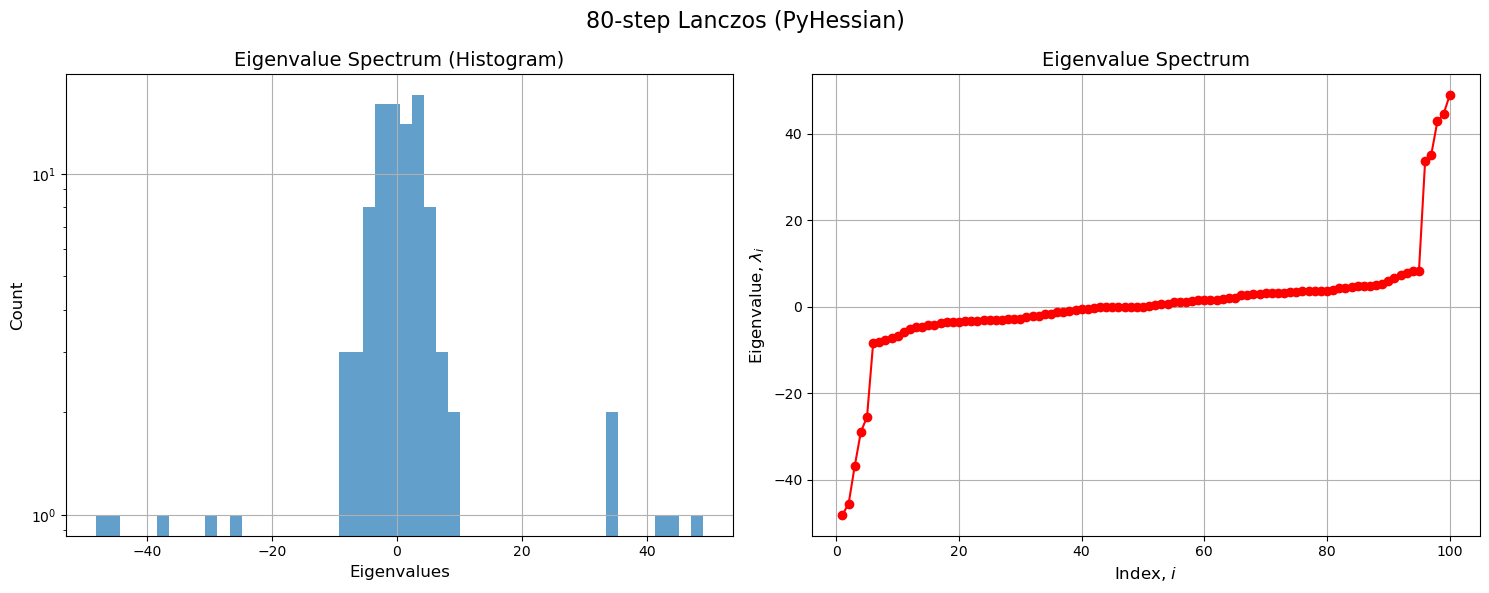

L2 distance: 17.599340438842773


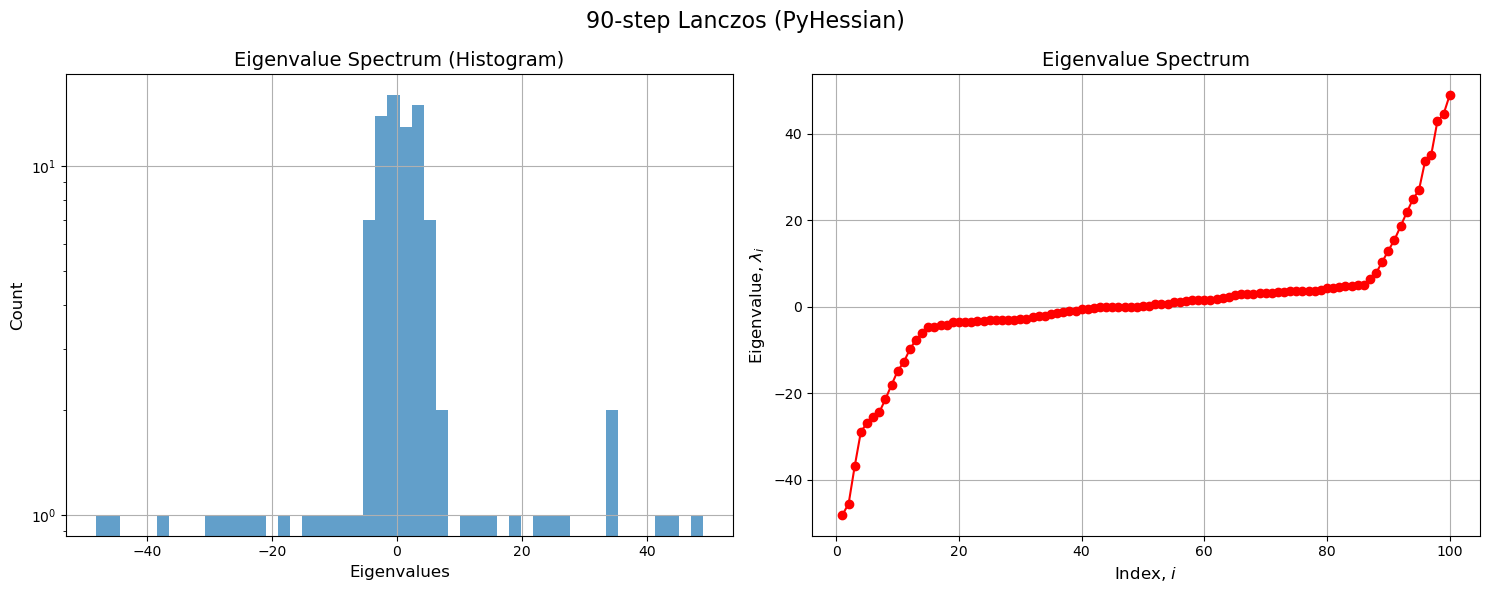

L2 distance: 58.98058319091797


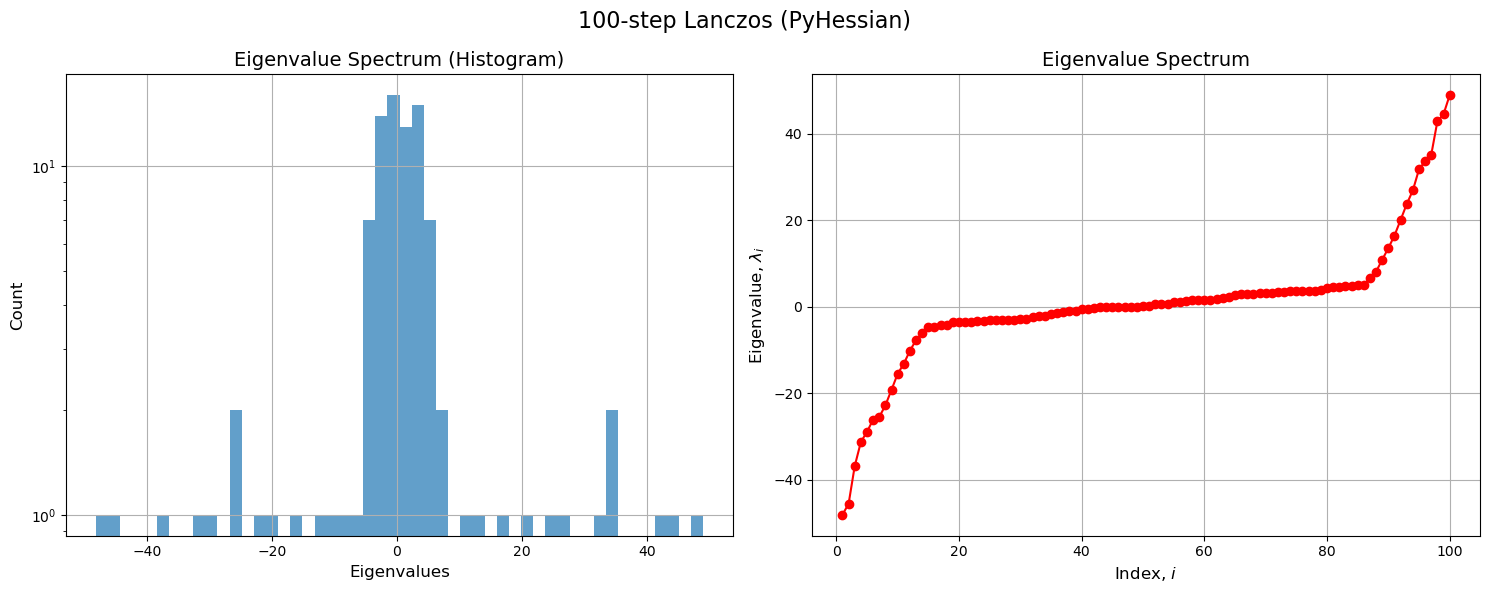

L2 distance: 64.45820617675781


In [97]:
# find reasonable d for d-step Lanczos
for d in range(0, mtx_size+10, 10):
    eigenvalues_d_lanczos_papyan, _, _, _ = mtx.d_lanczos_pyhessian(mtx_size, seed=seed, d=d)
    plot_spectrum_combined(eigenvalues_d_lanczos_papyan, num_bins=num_bins, title=f'{d}-step Lanczos (PyHessian)')
    print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanczos_papyan), 2)}")

#### 15-Lanczos (PyHessian's version)

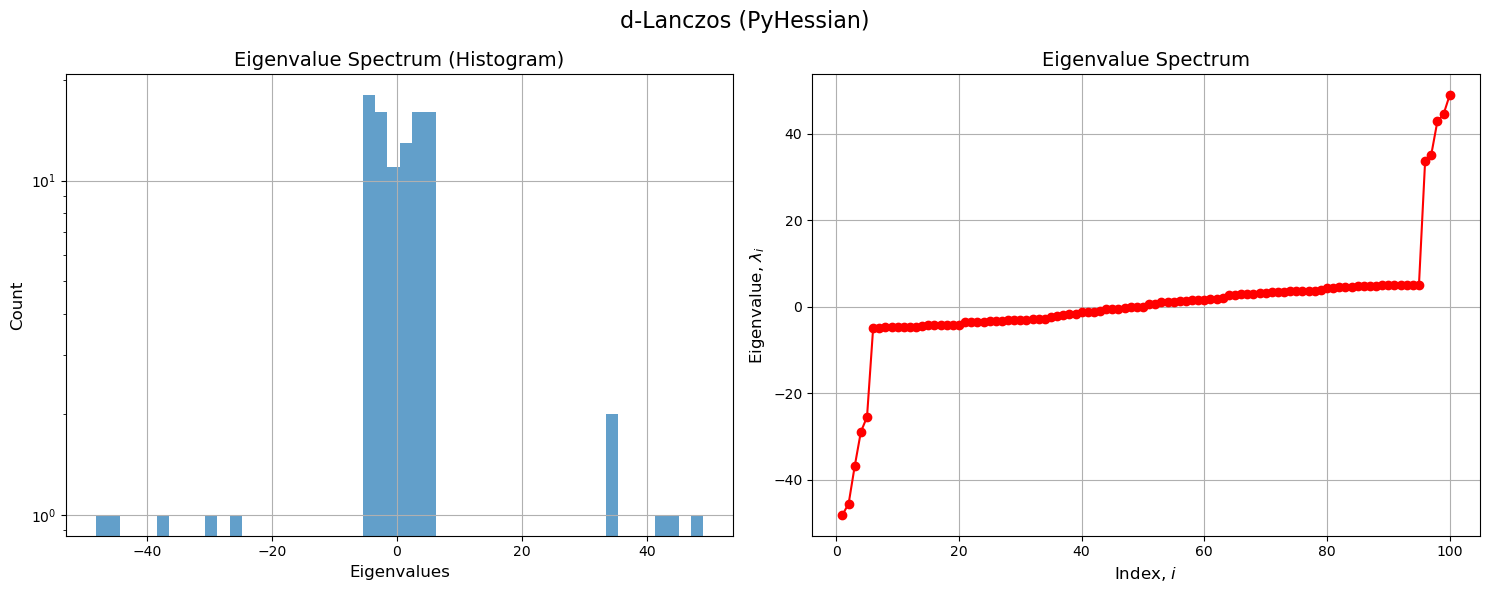

L2 distance: 16.538673400878906


In [112]:
good_d_value = 15
good_eigenvalues_d_lanzcos_pyhessian, _, alpha_d_pyhessian, beta_d_pyhessian = mtx.d_lanczos_pyhessian(mtx_size, seed=seed, d=good_d_value)
plot_spectrum_combined(good_eigenvalues_d_lanzcos_pyhessian, num_bins=num_bins, title='d-Lanczos (PyHessian)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(good_eigenvalues_d_lanzcos_pyhessian), 2)}")

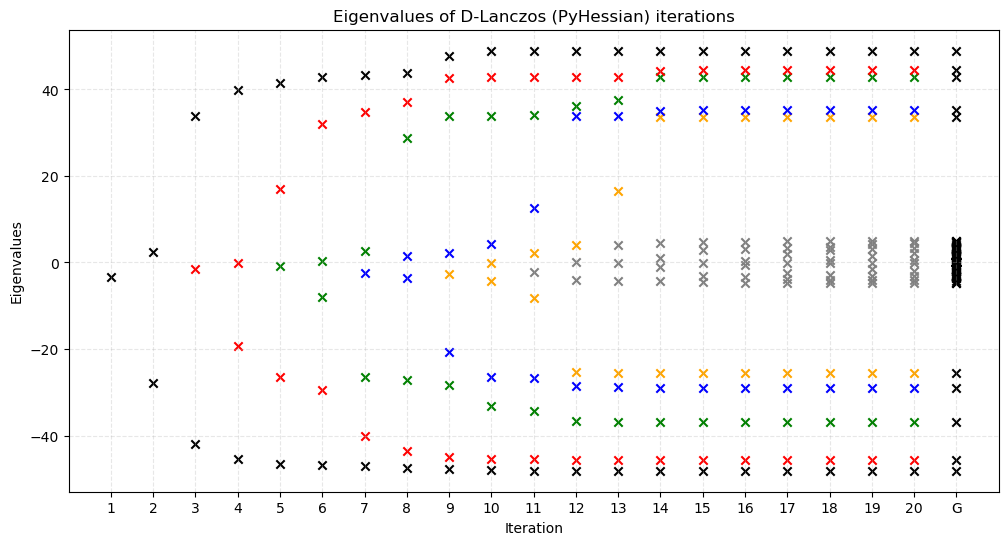

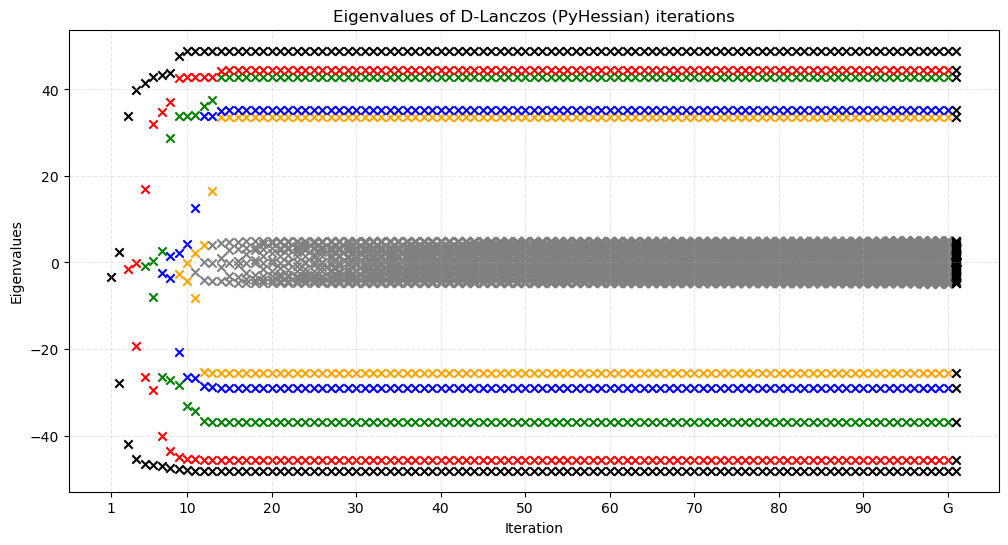

In [102]:
eigenvalues_d_lanczos_pyhessian_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.d_lanczos_pyhessian(iter+1, seed=seed, d=good_d_value)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{good_d_value}-Lanczos (PyHessian)")
eigenvalues_d_lanczos_pyhessian_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.d_lanczos_pyhessian(iter+1, seed=seed, d=good_d_value)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{good_d_value}-Lanczos (PyHessian)")

#### 10-Lanczos (PyHessian's version)

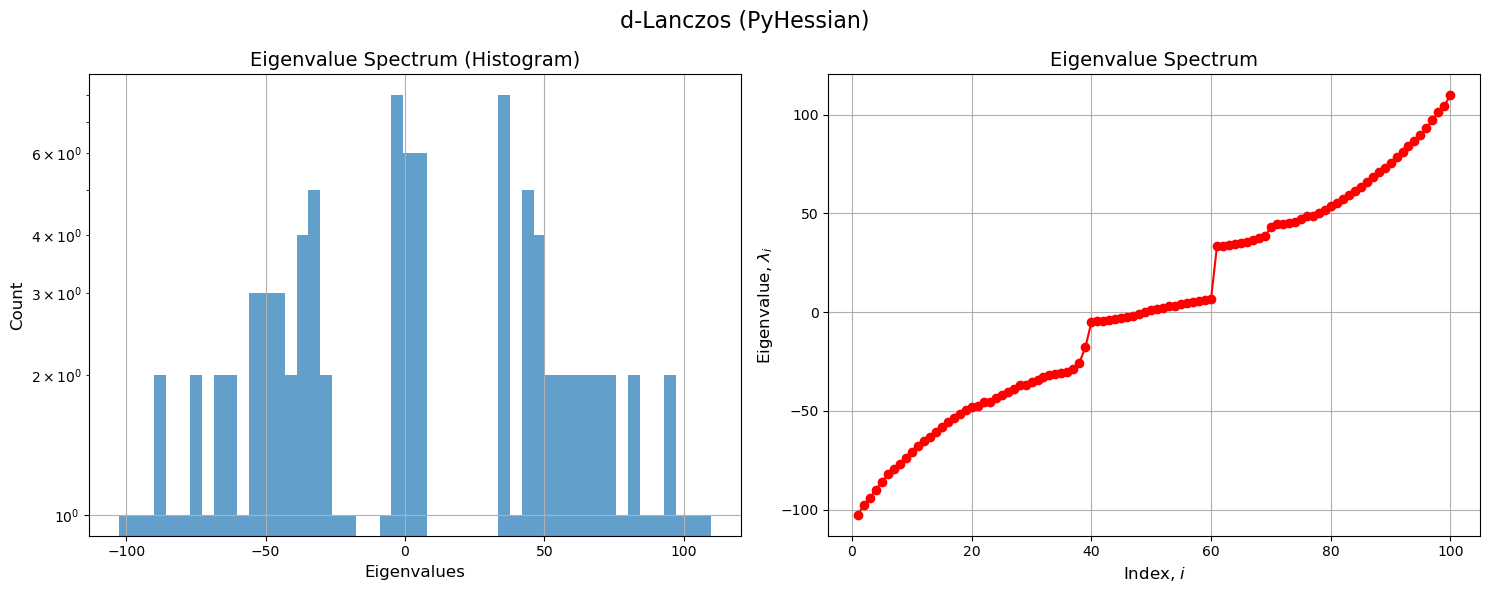

L2 distance: 468.76165771484375


In [125]:
bad_d_value = 10
bad_eigenvalues_d_lanzcos_pyhessian, _, alpha_d_pyhessian, beta_d_pyhessian = mtx.d_lanczos_pyhessian(mtx_size, seed=seed, d=bad_d_value)
plot_spectrum_combined(bad_eigenvalues_d_lanzcos_pyhessian, num_bins=num_bins, title='d-Lanczos (PyHessian)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(bad_eigenvalues_d_lanzcos_pyhessian), 2)}")

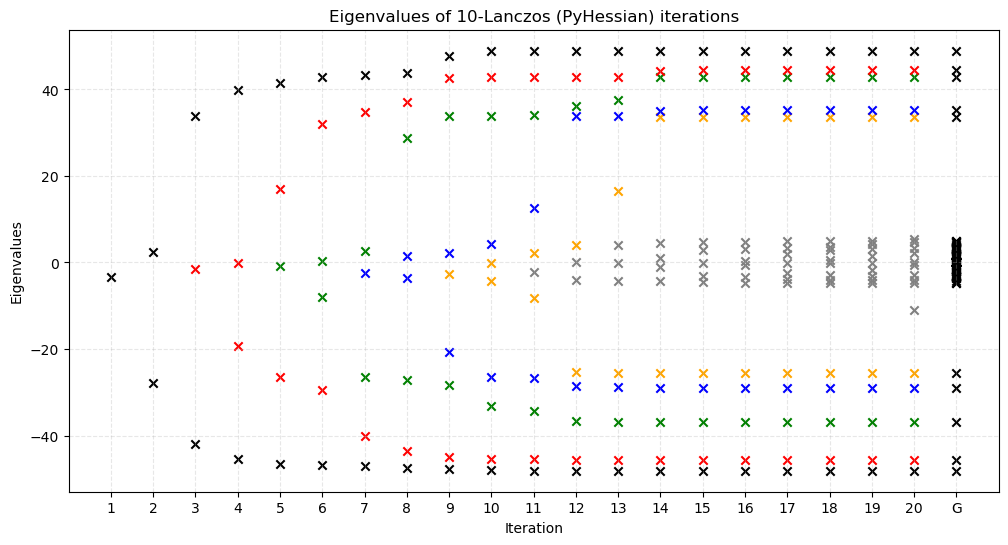

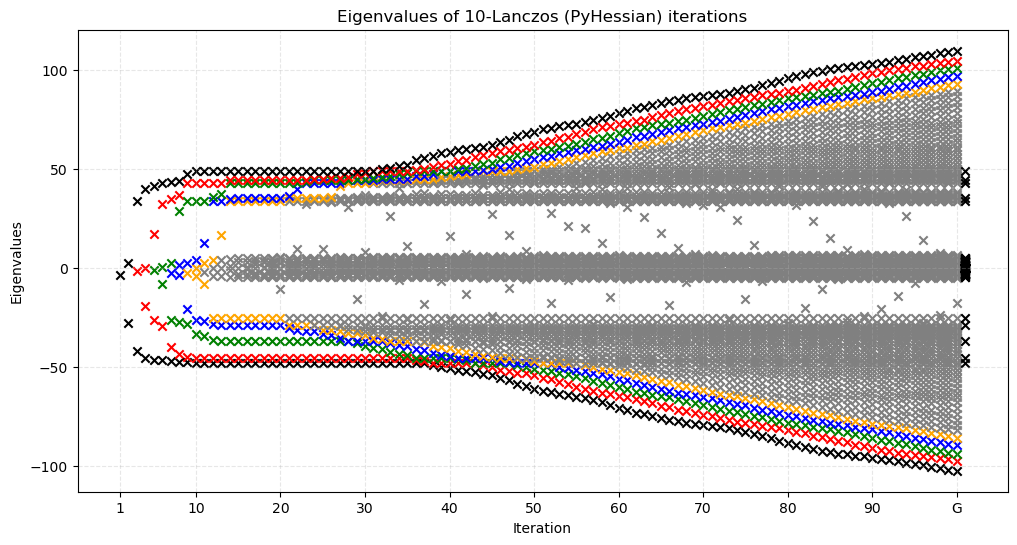

In [126]:
eigenvalues_d_lanczos_pyhessian_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.d_lanczos_pyhessian(iter+1, seed=seed, d=bad_d_value)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{bad_d_value}-Lanczos (PyHessian)")
eigenvalues_d_lanczos_pyhessian_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.d_lanczos_pyhessian(iter+1, seed=seed, d=bad_d_value)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{bad_d_value}-Lanczos (PyHessian)")

#### Compare eigenvalues obtained by different algorithms

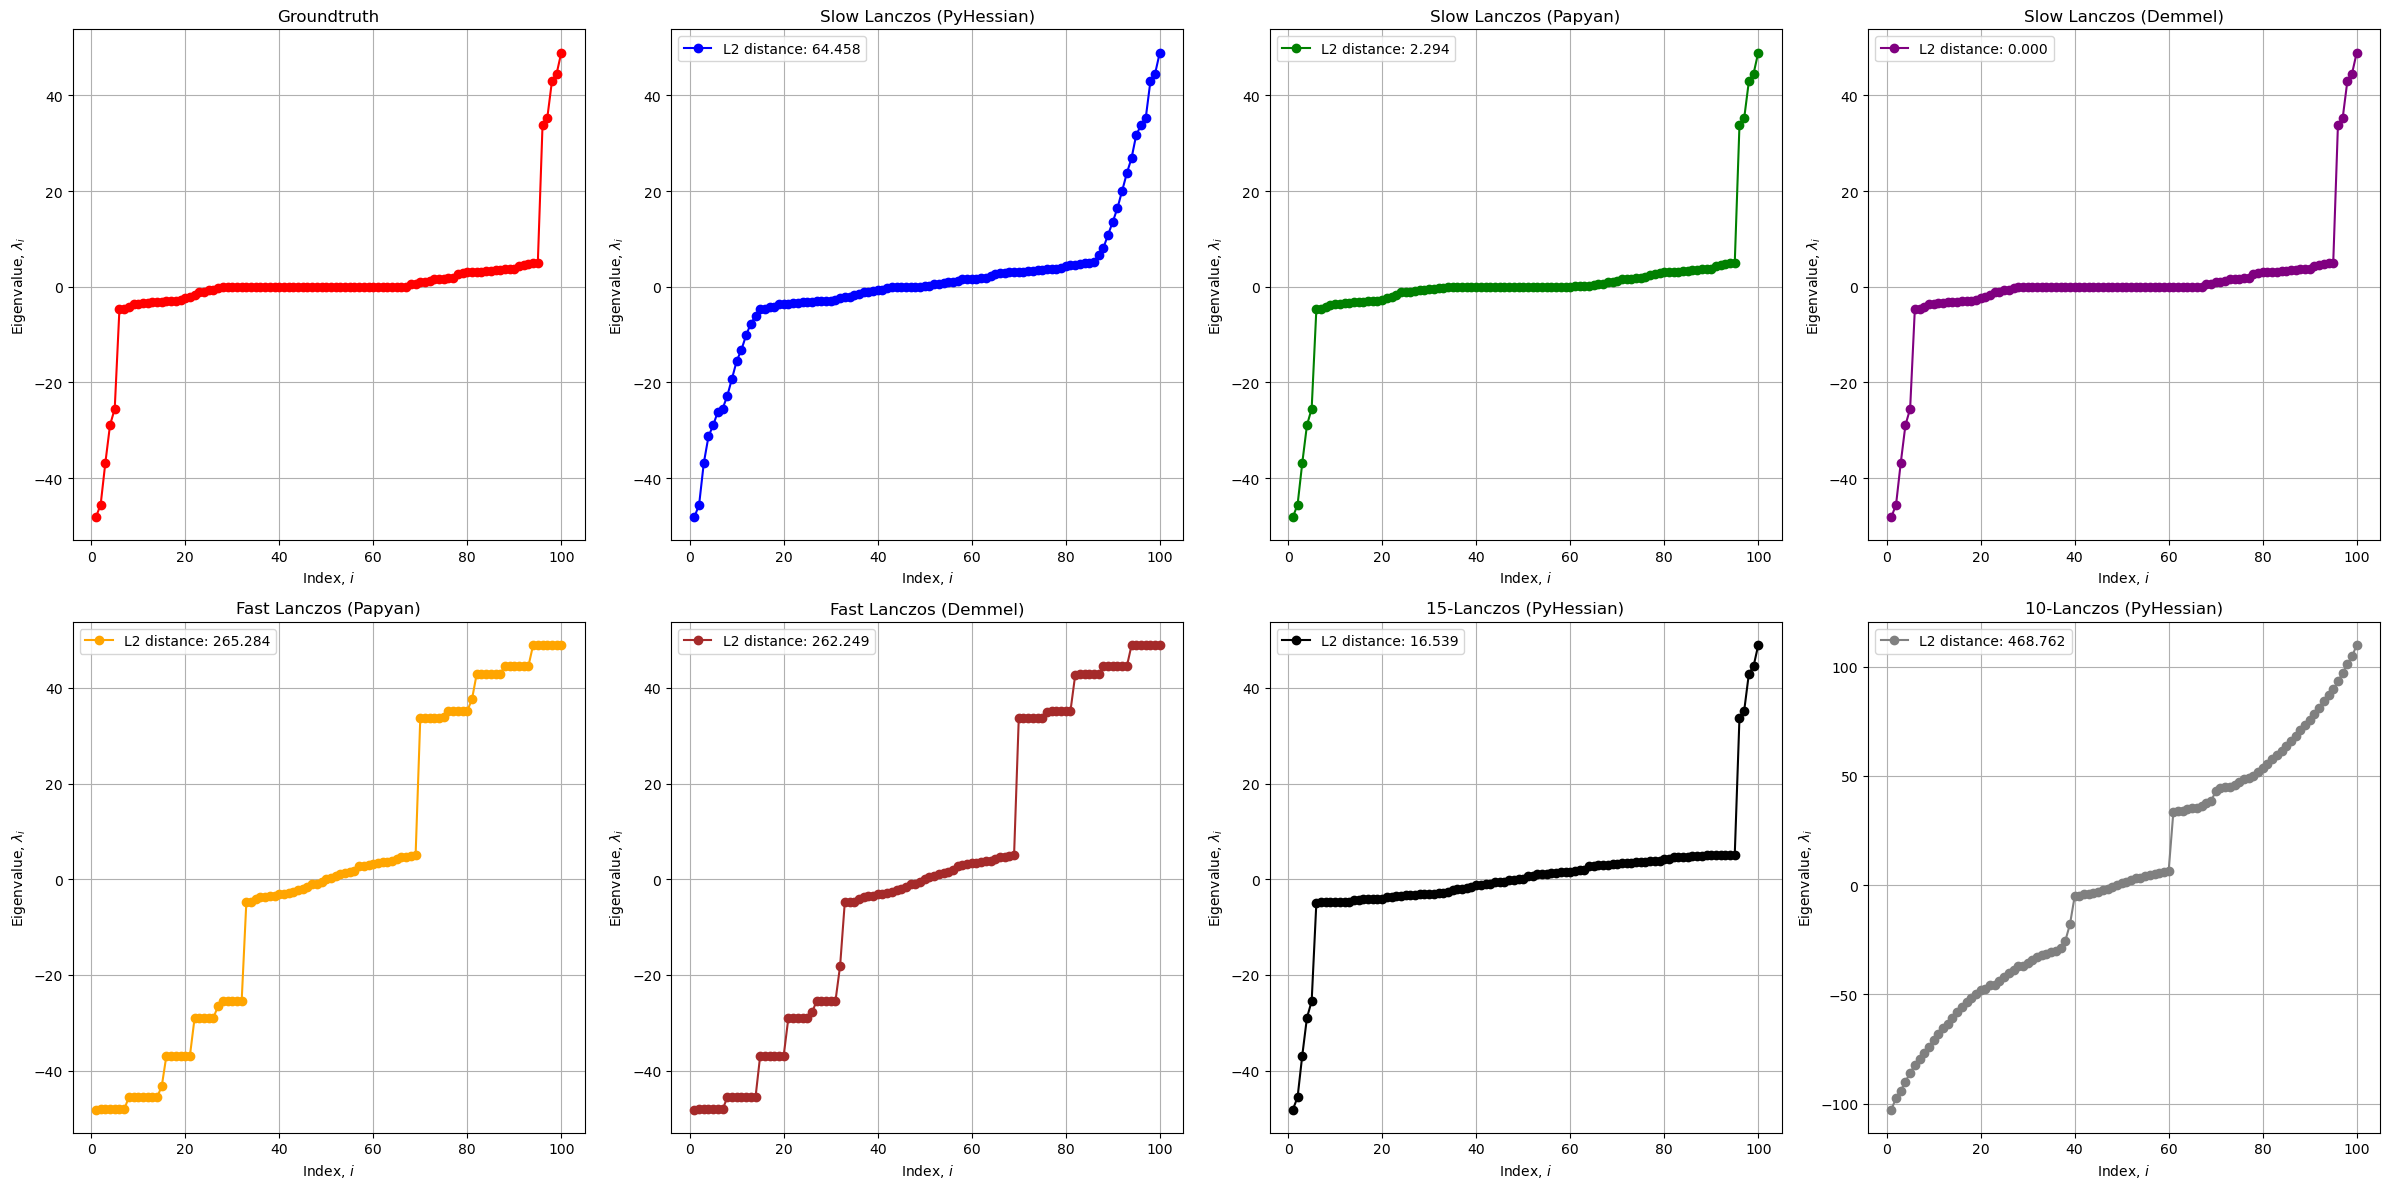

In [116]:
# convert to torch tensors
eigenvalues_slow_lanczos_pyhessian = torch.FloatTensor(eigenvalues_slow_lanczos_pyhessian)
eigenvalues_slow_lanczos_papyan = torch.FloatTensor(eigenvalues_slow_lanczos_papyan)
eigenvalues_slow_lanczos_demmel = torch.FloatTensor(eigenvalues_slow_lanczos_demmel)
eigenvalues_fast_lanczos_papyan = torch.FloatTensor(eigenvalues_fast_lanczos_papyan)
eigenvalues_fast_lanczos_demmel = torch.FloatTensor(eigenvalues_fast_lanczos_demmel)
good_eigenvalues_d_lanzcos_pyhessian = torch.FloatTensor(good_eigenvalues_d_lanzcos_pyhessian)
bad_eigenvalues_d_lanzcos_pyhessian = torch.FloatTensor(bad_eigenvalues_d_lanzcos_pyhessian)
# plot the eigenvalues
fig, ax = plt.subplots(2, 4, figsize=(24, 12))
x_indices = torch.arange(1, mtx_size+1)
# Groundtruth
ax[0, 0].plot(x_indices, torch.sort(eigenvalues).values, marker="o", linestyle="-", color="red")
ax[0, 0].set_xlabel(r"Index, $i$")
ax[0, 0].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 0].set_title("Groundtruth")
ax[0, 0].grid(True)
# Slow Lanczos (PyHessian)
ax[0, 1].plot(x_indices, torch.sort(eigenvalues_slow_lanczos_pyhessian).values, marker="o", linestyle="-", color="blue")
ax[0, 1].set_xlabel(r"Index, $i$")
ax[0, 1].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 1].set_title("Slow Lanczos (PyHessian)")
ax[0, 1].grid(True)
ax[0, 1].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_pyhessian), 2):.3f}"])
# Slow Lanczos (Papyan)
ax[0, 2].plot(x_indices, torch.sort(eigenvalues_slow_lanczos_papyan).values, marker="o", linestyle="-", color="green")
ax[0, 2].set_xlabel(r"Index, $i$")
ax[0, 2].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 2].set_title("Slow Lanczos (Papyan)")
ax[0, 2].grid(True)
ax[0, 2].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_papyan), 2):.3f}"])
# Slow Lanczos (Demmel)
ax[0, 3].plot(x_indices, torch.sort(eigenvalues_slow_lanczos_demmel).values, marker="o", linestyle="-", color="purple")
ax[0, 3].set_xlabel(r"Index, $i$")
ax[0, 3].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 3].set_title("Slow Lanczos (Demmel)")
ax[0, 3].grid(True)
ax[0, 3].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_demmel), 2):.3f}"])
# Fast Lanczos (Papyan)
ax[1, 0].plot(x_indices, torch.sort(eigenvalues_fast_lanczos_papyan).values, marker="o", linestyle="-", color="orange")
ax[1, 0].set_xlabel(r"Index, $i$")
ax[1, 0].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 0].set_title("Fast Lanczos (Papyan)")
ax[1, 0].grid(True)
ax[1, 0].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_papyan), 2):.3f}"])
# Fast Lanczos (Demmel)
ax[1, 1].plot(x_indices, torch.sort(eigenvalues_fast_lanczos_demmel).values, marker="o", linestyle="-", color="brown")
ax[1, 1].set_xlabel(r"Index, $i$")
ax[1, 1].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 1].set_title("Fast Lanczos (Demmel)")
ax[1, 1].grid(True)
ax[1, 1].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_demmel), 2):.3f}"])
# d-Lanczos (PyHessian)
ax[1, 2].plot(x_indices, torch.sort(good_eigenvalues_d_lanzcos_pyhessian).values, marker="o", linestyle="-", color="black")
ax[1, 2].set_xlabel(r"Index, $i$")
ax[1, 2].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 2].set_title(f"{good_d_value}-Lanczos (PyHessian)")
ax[1, 2].grid(True)
ax[1, 2].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(good_eigenvalues_d_lanzcos_pyhessian), 2):.3f}"])
# d-Lanczos (PyHessian)
ax[1, 3].plot(x_indices, torch.sort(bad_eigenvalues_d_lanzcos_pyhessian).values, marker="o", linestyle="-", color="gray")
ax[1, 3].set_xlabel(r"Index, $i$")
ax[1, 3].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 3].set_title(f"{bad_d_value}-Lanczos (PyHessian)")
ax[1, 3].grid(True)
ax[1, 3].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(bad_eigenvalues_d_lanzcos_pyhessian), 2):.3f}"])
plt.tight_layout()
plt.show()

In [117]:
# check positive extremes
print("Check positive extremes:")
print(f"Groundtruth: {torch.sort(eigenvalues[eigenvalues > dict_eigenvalues['pos_low']]).values}")
print(f"Slow Lanczos (PyHessian): {torch.sort(eigenvalues_slow_lanczos_pyhessian[eigenvalues_slow_lanczos_pyhessian > dict_eigenvalues['pos_low']]).values}")
print(f"Slow Lanczos (Papyan): {torch.sort(eigenvalues_slow_lanczos_papyan[eigenvalues_slow_lanczos_papyan > dict_eigenvalues['pos_low']]).values}")
print(f"Slow Lanczos (Demmel): {torch.sort(eigenvalues_slow_lanczos_demmel[eigenvalues_slow_lanczos_demmel > dict_eigenvalues['pos_low']]).values}")
print(f"Fast Lanczos (Papyan): {torch.sort(eigenvalues_fast_lanczos_papyan[eigenvalues_fast_lanczos_papyan > dict_eigenvalues['pos_low']]).values}")
print(f"Fast Lanczos (Demmel): {torch.sort(eigenvalues_fast_lanczos_demmel[eigenvalues_fast_lanczos_demmel > dict_eigenvalues['pos_low']]).values}")
print(f"{good_d_value}-Lanczos (PyHessian): {torch.sort(good_eigenvalues_d_lanzcos_pyhessian[good_eigenvalues_d_lanzcos_pyhessian > dict_eigenvalues['pos_low']]).values}")
print(f"{bad_d_value}-Lanczos (PyHessian): {torch.sort(bad_eigenvalues_d_lanzcos_pyhessian[bad_eigenvalues_d_lanzcos_pyhessian > dict_eigenvalues['pos_low']]).values}")


Check positive extremes:
Groundtruth: tensor([33.7161, 35.1872, 42.9125, 44.5474, 48.9485])
Slow Lanczos (PyHessian): tensor([26.9349, 31.7790, 33.7160, 35.1872, 42.9125, 44.5474, 48.9486])
Slow Lanczos (Papyan): tensor([33.7160, 35.1872, 42.9125, 44.5474, 48.9485])
Slow Lanczos (Demmel): tensor([33.7160, 35.1872, 42.9125, 44.5473, 48.9485])
Fast Lanczos (Papyan): tensor([33.7160, 33.7160, 33.7160, 33.7161, 33.7161, 33.8467, 35.1872, 35.1872,
        35.1873, 35.1874, 35.1874, 37.6408, 42.9125, 42.9125, 42.9125, 42.9126,
        42.9127, 42.9957, 44.5472, 44.5472, 44.5473, 44.5474, 44.5474, 44.5475,
        48.9484, 48.9484, 48.9485, 48.9486, 48.9486, 48.9486, 48.9486])
Fast Lanczos (Demmel): tensor([33.6198, 33.7159, 33.7160, 33.7160, 33.7161, 33.7161, 35.0329, 35.1871,
        35.1872, 35.1873, 35.1873, 35.1873, 42.6279, 42.9124, 42.9125, 42.9125,
        42.9126, 42.9126, 44.5473, 44.5473, 44.5474, 44.5474, 44.5475, 44.5475,
        48.9484, 48.9484, 48.9485, 48.9485, 48.9485, 48.94

In [118]:
# check negative extremes
print("Check negative extremes:")
print(f"Groundtruth: {torch.sort(eigenvalues[eigenvalues < dict_eigenvalues['neg_high']]).values}")
print(f"Slow Lanczos (PyHessian): {torch.sort(eigenvalues_slow_lanczos_pyhessian[eigenvalues_slow_lanczos_pyhessian < dict_eigenvalues['neg_high']]).values}")
print(f"Slow Lanczos (Papyan): {torch.sort(eigenvalues_slow_lanczos_papyan[eigenvalues_slow_lanczos_papyan < dict_eigenvalues['neg_high']]).values}")
print(f"Slow Lanczos (Demmel): {torch.sort(eigenvalues_slow_lanczos_demmel[eigenvalues_slow_lanczos_demmel < dict_eigenvalues['neg_high']]).values}")
print(f"Fast Lanczos (Papyan): {torch.sort(eigenvalues_fast_lanczos_papyan[eigenvalues_fast_lanczos_papyan < dict_eigenvalues['neg_high']]).values}")
print(f"Fast Lanczos (Demmel): {torch.sort(eigenvalues_fast_lanczos_demmel[eigenvalues_fast_lanczos_demmel < dict_eigenvalues['neg_high']]).values}")
print(f"{good_d_value}-Lanczos (PyHessian): {torch.sort(good_eigenvalues_d_lanzcos_pyhessian[good_eigenvalues_d_lanzcos_pyhessian < dict_eigenvalues['neg_high']]).values}")
print(f"{bad_d_value}-Lanczos (PyHessian): {torch.sort(bad_eigenvalues_d_lanzcos_pyhessian[bad_eigenvalues_d_lanzcos_pyhessian < dict_eigenvalues['neg_high']]).values}")


Check negative extremes:
Groundtruth: tensor([-48.1304, -45.5801, -36.8473, -28.9318, -25.5014])
Slow Lanczos (PyHessian): tensor([-48.1304, -45.5801, -36.8473, -31.2873, -28.9317, -26.1024, -25.5014])
Slow Lanczos (Papyan): tensor([-48.1303, -45.5801, -36.8472, -28.9317, -25.5014])
Slow Lanczos (Demmel): tensor([-48.1303, -45.5800, -36.8473, -28.9318, -25.5014])
Fast Lanczos (Papyan): tensor([-48.1304, -48.1304, -48.1304, -48.1304, -48.1303, -48.1302, -48.1302,
        -45.5803, -45.5802, -45.5802, -45.5801, -45.5801, -45.5801, -45.5800,
        -43.2843, -36.8474, -36.8473, -36.8473, -36.8473, -36.8472, -36.8472,
        -28.9318, -28.9318, -28.9318, -28.9318, -28.9318, -26.4610, -25.5014,
        -25.5014, -25.5014, -25.5014, -25.5013])
Fast Lanczos (Demmel): tensor([-48.1304, -48.1304, -48.1303, -48.1303, -48.1303, -48.1303, -48.1302,
        -45.5802, -45.5802, -45.5801, -45.5801, -45.5801, -45.5800, -45.5794,
        -36.8473, -36.8473, -36.8473, -36.8473, -36.8472, -36.8472, -28

In [119]:
# check number of exact zeros
print("Check number of exact zeros:")
print(f"Groundtruth: {torch.sum(eigenvalues == 0)}")
print(f"Slow Lanczos (PyHessian): {torch.sum(eigenvalues_slow_lanczos_pyhessian == 0)}")
print(f"Slow Lanczos (Papyan): {torch.sum(eigenvalues_slow_lanczos_papyan == 0)}")
print(f"Slow Lanczos (Demmel): {torch.sum(eigenvalues_slow_lanczos_demmel == 0)}")
print(f"Fast Lanczos (Papyan): {torch.sum(eigenvalues_fast_lanczos_papyan == 0)}")
print(f"Fast Lanczos (Demmel): {torch.sum(eigenvalues_fast_lanczos_demmel == 0)}")
print(f"{good_d_value}-Lanczos (PyHessian): {torch.sum(good_eigenvalues_d_lanzcos_pyhessian == 0)}")
print(f"{bad_d_value}-Lanczos (PyHessian): {torch.sum(bad_eigenvalues_d_lanzcos_pyhessian == 0)}")

Check number of exact zeros:
Groundtruth: 40
Slow Lanczos (PyHessian): 0
Slow Lanczos (Papyan): 0
Slow Lanczos (Demmel): 32
Fast Lanczos (Papyan): 0
Fast Lanczos (Demmel): 0
15-Lanczos (PyHessian): 0
10-Lanczos (PyHessian): 0


In [120]:
# check number of close to zeros
print("Check number of close to zeros:")
threshold = 1e-5
print(f"Groundtruth: {torch.sum(torch.abs(eigenvalues) < threshold)}")
print(f"Slow Lanczos (PyHessian): {torch.sum(torch.abs(eigenvalues_slow_lanczos_pyhessian) < threshold)}")
print(f"Slow Lanczos (Papyan): {torch.sum(torch.abs(eigenvalues_slow_lanczos_papyan) < threshold)}")
print(f"Slow Lanczos (Demmel): {torch.sum(torch.abs(eigenvalues_slow_lanczos_demmel) < threshold)}")
print(f"Fast Lanczos (Papyan): {torch.sum(torch.abs(eigenvalues_fast_lanczos_papyan) < threshold)}")
print(f"Fast Lanczos (Demmel): {torch.sum(torch.abs(eigenvalues_fast_lanczos_demmel) < threshold)}")
print(f"{good_d_value}-Lanczos (PyHessian): {torch.sum(torch.abs(good_eigenvalues_d_lanzcos_pyhessian) < threshold)}")
print(f"{bad_d_value}-Lanczos (PyHessian): {torch.sum(torch.abs(bad_eigenvalues_d_lanzcos_pyhessian) < threshold)}")

Check number of close to zeros:
Groundtruth: 40
Slow Lanczos (PyHessian): 3
Slow Lanczos (Papyan): 5
Slow Lanczos (Demmel): 40
Fast Lanczos (Papyan): 0
Fast Lanczos (Demmel): 0
15-Lanczos (PyHessian): 1
10-Lanczos (PyHessian): 0


#### Compare $\alpha_k$ and $\beta_k$ obtained by different algorithms

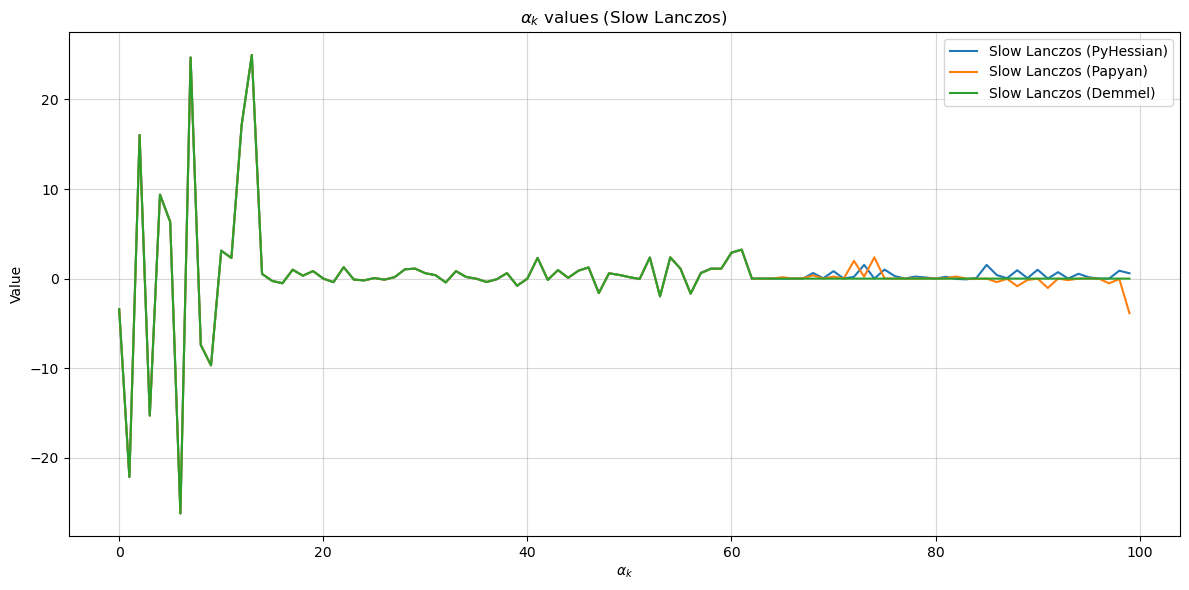

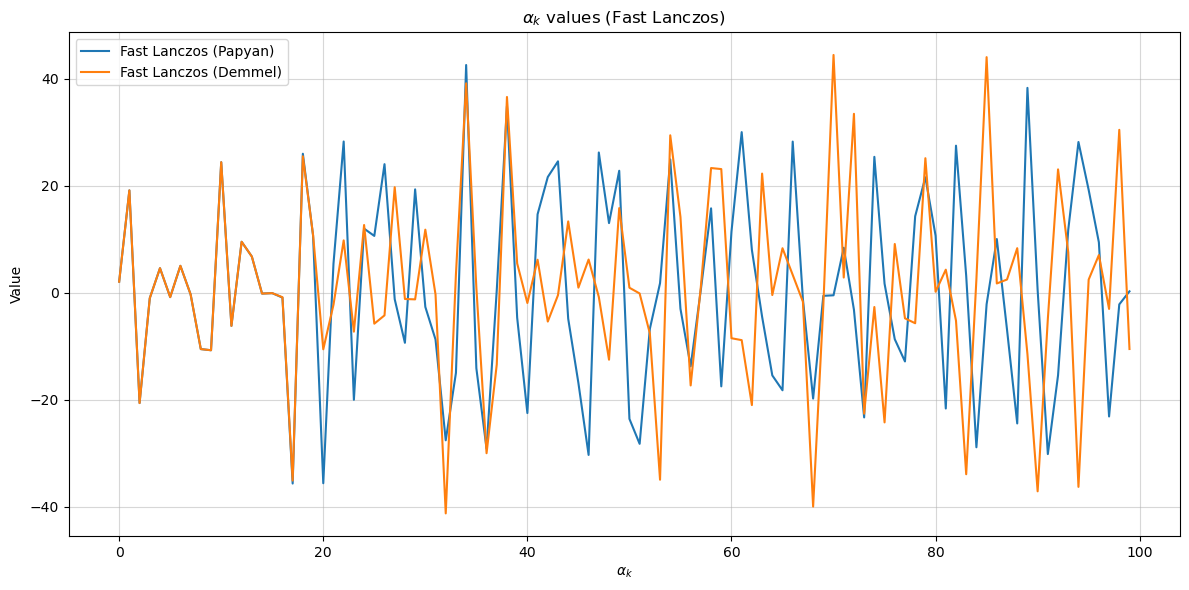

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(alpha_slow_pyhessian, label='Slow Lanczos (PyHessian)')
plt.plot(alpha_slow_papyan, label='Slow Lanczos (Papyan)')
plt.plot(alpha_slow_demmel, label='Slow Lanczos (Demmel)')
plt.title(r"$\alpha_k$ values (Slow Lanczos)")
plt.xlabel(r"$\alpha_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(alpha_fast_papyan, label='Fast Lanczos (Papyan)')
plt.plot(alpha_fast_demmel, label='Fast Lanczos (Demmel)')
plt.title(r"$\alpha_k$ values (Fast Lanczos)")
plt.xlabel(r"$\alpha_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

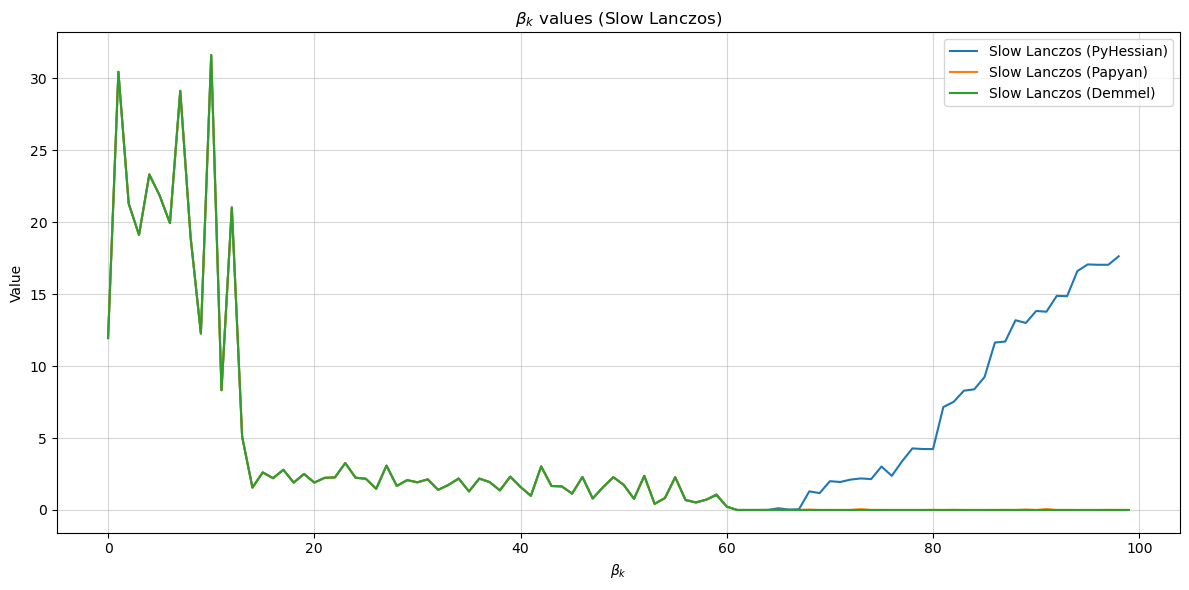

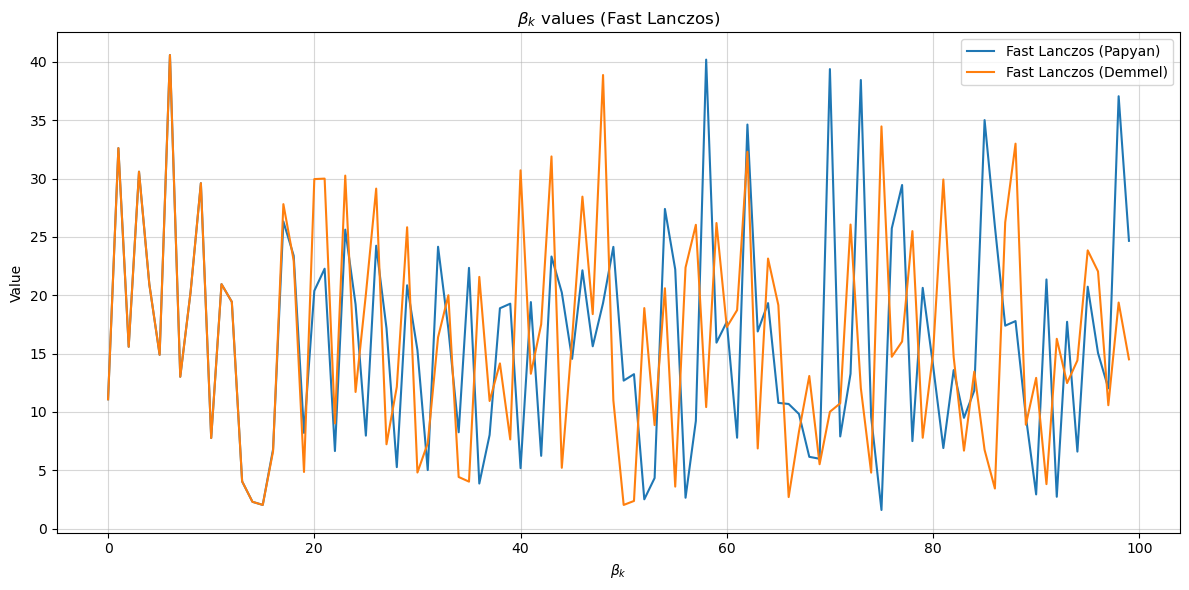

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(beta_slow_pyhessian, label='Slow Lanczos (PyHessian)')
plt.plot(beta_slow_papyan, label='Slow Lanczos (Papyan)')
plt.plot(beta_slow_demmel, label='Slow Lanczos (Demmel)')
plt.title(r"$\beta_k$ values (Slow Lanczos)")
plt.xlabel(r"$\beta_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(beta_fast_papyan, label='Fast Lanczos (Papyan)')
plt.plot(beta_fast_demmel, label='Fast Lanczos (Demmel)')
plt.title(r"$\beta_k$ values (Fast Lanczos)")
plt.xlabel(r"$\beta_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()